Equipe: Cleidiane Souza, Isabela Marinho, Leonardo Melo, Milena Cordeiro e Mônica Rivas.

Especialização em Data Science & Analytics - Senai Cimatec

Link do desafio no Kaggle: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Vocês devem gerar um modelo de regressão com o objetivo de responder as seguintes perguntas:


1- Quais são as variáveis que realmente afetam a expectativa de vida?

2- Um país com expectativa de vida menor (<65) deve aumentar seus investimentos em saúde a fim de melhorar sua expectativa de vida média?

3- Como as taxas de mortalidade infantil e de adultos afetam a expectativa de vida?

4- A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.

5- Qual é o impacto da escolaridade na expectativa de vida dos humanos?

6- A expectativa de vida tem uma relação positiva ou negativa com o consumo de álcool?

7- Países densamente povoados tendem a ter menor expectativa de vida?

8- Qual é o impacto da cobertura de imunização na expectativa de vida?

#Atributos do dataset

https://classroom.google.com/c/NjA0MzYzODExMTcy/a/NjE0NDYyMjgxMjA1/details

* Country (**pais**): País analisado;
* Year (**ano**): Ano de referência da análise;
* Status	(**situacao**):	Estado Desenvolvido ou Em Desenvolvimento;
* Life expectancy	(**expectativa_vida**):	Expectativa de vida na idade;
* Adult Mortality	(**mortalidade_adultos**):	Taxas de mortalidade adulta de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes);
* infant deaths 	(**mortalidade_infantil**):	Número de óbitos infantis por 1.000 habitantes;
* Alcohol	(**alcool**):	Álcool, consumo registrado per capita (15+) (em litros de álcool puro);
* percentage expenditure	(**perc_depesas**):	Gastos com saúde como porcentagem do Produto Interno Bruto per capita (%);
* Hepatitis B	(**hepatite_b**):	Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%);
* Measles	(**sarampo**):	Sarampo - número de casos notificados por 1000 habitantes;
* BMI	(**imc**):	Índice de Massa Corporal Médio de toda a população;
* under-five deaths	(**mortes_menor_5_anos**):	Número de mortes de menores de cinco anos por 1000 habitantes;
* Polio	(**poliomielite**):	Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%);
* Total expenditure	(**gastos_totais**):	Gastos do governo geral com saúde como porcentagem do gasto total do governo (%);
* Diphtheria	(difteria):	Cobertura vacinal contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%);
* HIV/AIDS	(**hiv_aids**):	Mortes por 1 000 nascidos vivos HIV/AIDS (0-4 anos);
* GDP	(**pib**):	Produto Interno Bruto per capita (em USD);
* Population	(**populacao**):	População do país;
* thinness  1-19 years	(**desnutricao_10-19**):	Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%);
* thinness 5-9 years	(**desnutricao_5-9**):	Prevalência de magreza em crianças de 5 a 9 anos (%);
* Income composition of resources	(**composicao_renda**):	Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1);
* Schooling	(**escolaridade**):	Número de anos de escolaridade (anos).


#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Comentado por que? Para só executar quando for necessário ou não vamos utilizar?
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import re
import math
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from scipy.stats import shapiro, probplot, kstest
from scipy.stats import f
from scipy.stats import normaltest
from scipy.stats import probplot
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import chi2
from statsmodels.stats.stattools import durbin_watson

sns.set_style("whitegrid")

seed = 42

#Leitura do dataset

In [ ]:

def leitura_dataset():
  #from google.colab import drive
  #drive.mount('/content/drive/MyDrive/Mineração de Dados/')
  df = pd.read_csv('/content/Life Expectancy Data.xls')
  #df = pd.read_csv('/content/Country-data.csv')
  #df = pd.read_csv('/content/Country-data.csv')
  return df

In [ ]:
#Lendo tudo do Google Drive - pasta compartilhada com a equipe
#df = leitura_dataset()

In [ ]:
#Lendo tudo do Google Drive - pasta compartilhada com a equipe
from google.colab import drive
drive.mount('/content/drive')

pasta_compartilhada_id = 'arqs_trab_final_HandsOn'
pasta_compartilhada_path = f"/content/drive/Shared drives/{pasta_compartilhada_id}"

%cd '{pasta_compartilhada_path}'

df = pd.read_csv('Life Expectancy Data.csv')
#pop_paises = pd.read_csv('populacao.csv')
#pib_paises = pd.read_csv('UNdata_Export_20230702_222747167.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shared drives/arqs_trab_final_HandsOn


#Análise Exploratória

O dataset possuim 2.938 observações. São indicadores de 193 países ao longo de 16 anos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
df.describe().round(2)

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
count  2938.00           2928.00          2928.00        2938.00  2744.00   
mean   2007.52             69.22           164.80          30.30     4.60   
std       4.61              9.52           124.29         117.93     4.05   
min    2000.00             36.30             1.00           0.00     0.01   
25%    2004.00             63.10            74.00           0.00     0.88   
50%    2008.00             72.10           144.00           3.00     3.76   
75%    2012.00             75.70           228.00          22.00     7.70   
max    2015.00             89.00           723.00        1800.00    17.87   

       percentage expenditure  Hepatitis B   Measles      BMI   \
count                 2938.00      2385.00    2938.00  2904.00   
mean                   738.25        80.94    2419.59    38.32   
std                   1987.91        25.07   11467.27    20.04   
min                      0.00         1.00       0.00     1.00   
25%                      4.69        77.00       0.00    19.30   
50%                     64.91        92.00      17.00    43.50   
75%                    441.53        97.00     360.25    56.20   
max                  19479.91        99.00  212183.00    87.30   

       under-five deaths     Polio  Total expenditure  Diphtheria    HIV/AIDS  \
count             2938.00  2919.00            2712.00      2919.00    2938.00   
mean                42.04    82.55               5.94        82.32       1.74   
std                160.45    23.43               2.50        23.72       5.08   
min                  0.00     3.00               0.37         2.00       0.10   
25%                  0.00    78.00               4.26        78.00       0.10   
50%                  4.00    93.00               5.76        93.00       0.10   
75%                 28.00    97.00               7.49        97.00       0.80   
max               2500.00    99.00              17.60        99.00      50.60   

             GDP    Population   thinness  1-19 years   thinness 5-9 years  \
count    2490.00  2.286000e+03                2904.00              2904.00   
mean     7483.16  1.275338e+07                   4.84                 4.87   
std     14270.17  6.101210e+07                   4.42                 4.51   
min         1.68  3.400000e+01                   0.10                 0.10   
25%       463.94  1.957932e+05                   1.60                 1.50   
50%      1766.95  1.386542e+06                   3.30                 3.30   
75%      5910.81  7.420359e+06                   7.20                 7.20   
max    119172.74  1.293859e+09                  27.70                28.60   

       Income composition of resources  Schooling  
count                          2771.00    2775.00  
mean                              0.63      11.99  
std                               0.21       3.36  
min                               0.00       0.00  
25%                               0.49      10.10  
50%                               0.68      12.30  
75%                               0.78      14.30  
max                               0.95      20.70

##Renomear colunas e alterar tipo

In [ ]:
colunas = ['pais', 'ano', 'situacao', 'expectativa_vida', 'mortalidade_adultos',\
           'mortalidade_infantil', 'alcool', 'perc_depesas', 'hepatite_b', \
           'sarampo', 'imc', 'mortes_menor_5_anos', 'poliomielite', \
           'gastos_totais', 'difteria', 'hiv_aids', 'pib', 'populacao', \
           'desnutricao_10-19', 'desnutricao_5-9', 'composicao_renda', 'escolaridade']

In [ ]:
df.columns = colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  2938 non-null   object 
 1   ano                   2938 non-null   int64  
 2   situacao              2938 non-null   object 
 3   expectativa_vida      2928 non-null   float64
 4   mortalidade_adultos   2928 non-null   float64
 5   mortalidade_infantil  2938 non-null   int64  
 6   alcool                2744 non-null   float64
 7   perc_depesas          2938 non-null   float64
 8   hepatite_b            2385 non-null   float64
 9   sarampo               2938 non-null   int64  
 10  imc                   2904 non-null   float64
 11  mortes_menor_5_anos   2938 non-null   int64  
 12  poliomielite          2919 non-null   float64
 13  gastos_totais         2712 non-null   float64
 14  difteria              2919 non-null   float64
 15  hiv_aids             

In [ ]:
df['pais'] = df['pais'].astype('string')
df['situacao'] = df['situacao'].astype('string')
df['ano'] = df['ano'].astype('string')

In [ ]:
#Verificar mudança do tipo das 3 colunas
df[['pais','situacao','ano']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pais      2938 non-null   string
 1   situacao  2938 non-null   string
 2   ano       2938 non-null   string
dtypes: string(3)
memory usage: 69.0 KB


In [ ]:
tipos = ['float64', 'int64']
colunas_numericas = df.select_dtypes(include=tipos).columns
#colunas_numericas =  df.drop(['pais', 'situacao'], axis=1).columns
len(colunas_numericas)
colunas_numericas

Index(['expectativa_vida', 'mortalidade_adultos', 'mortalidade_infantil',
       'alcool', 'perc_depesas', 'hepatite_b', 'sarampo', 'imc',
       'mortes_menor_5_anos', 'poliomielite', 'gastos_totais', 'difteria',
       'hiv_aids', 'pib', 'populacao', 'desnutricao_10-19', 'desnutricao_5-9',
       'composicao_renda', 'escolaridade'],
      dtype='object')

In [ ]:
df_bkp = df.copy()

In [ ]:
num_paises_distintos = df['pais'].nunique()
print("Número de países distintos:", num_paises_distintos)

paises_distintos = sorted(df['pais'].unique())
#np.set_printoptions(threshold=np.inf)
print("Países distintos:", paises_distintos)

anos_distintos = sorted(df['ano'].unique())
#np.set_printoptions(threshold=np.inf)
print("Anos distintos:", anos_distintos)


Número de países distintos: 193
Países distintos: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guine

In [ ]:
df.describe().round(2)

expectativa_vida  mortalidade_adultos  mortalidade_infantil   alcool  \
count           2928.00              2928.00               2938.00  2744.00   
mean              69.22               164.80                 30.30     4.60   
std                9.52               124.29                117.93     4.05   
min               36.30                 1.00                  0.00     0.01   
25%               63.10                74.00                  0.00     0.88   
50%               72.10               144.00                  3.00     3.76   
75%               75.70               228.00                 22.00     7.70   
max               89.00               723.00               1800.00    17.87   

       perc_depesas  hepatite_b    sarampo      imc  mortes_menor_5_anos  \
count       2938.00     2385.00    2938.00  2904.00              2938.00   
mean         738.25       80.94    2419.59    38.32                42.04   
std         1987.91       25.07   11467.27    20.04               160.45   
min            0.00        1.00       0.00     1.00                 0.00   
25%            4.69       77.00       0.00    19.30                 0.00   
50%           64.91       92.00      17.00    43.50                 4.00   
75%          441.53       97.00     360.25    56.20                28.00   
max        19479.91       99.00  212183.00    87.30              2500.00   

       poliomielite  gastos_totais  difteria  hiv_aids        pib  \
count       2919.00        2712.00   2919.00   2938.00    2490.00   
mean          82.55           5.94     82.32      1.74    7483.16   
std           23.43           2.50     23.72      5.08   14270.17   
min            3.00           0.37      2.00      0.10       1.68   
25%           78.00           4.26     78.00      0.10     463.94   
50%           93.00           5.76     93.00      0.10    1766.95   
75%           97.00           7.49     97.00      0.80    5910.81   
max           99.00          17.60     99.00     50.60  119172.74   

          populacao  desnutricao_10-19  desnutricao_5-9  composicao_renda  \
count  2.286000e+03            2904.00          2904.00           2771.00   
mean   1.275338e+07               4.84             4.87              0.63   
std    6.101210e+07               4.42             4.51              0.21   
min    3.400000e+01               0.10             0.10              0.00   
25%    1.957932e+05               1.60             1.50              0.49   
50%    1.386542e+06               3.30             3.30              0.68   
75%    7.420359e+06               7.20             7.20              0.78   
max    1.293859e+09              27.70            28.60              0.95   

       escolaridade  
count       2775.00  
mean          11.99  
std            3.36  
min            0.00  
25%           10.10  
50%           12.30  
75%           14.30  
max           20.70

##Dados com valores incorretos

Identificamos 3 atributos cuja unidade de medida é em 1000 habitantes, mas eles possuem valores acima de 1000.
- sarampo
- mortalidade_infantil
- mortes_menor_5_anos

As observações que estavam nessa situação foram excluídas.

Atributo IMC possuiu muitas observações com valores acima de 50, um valor muito alto para a média de um páis, dando indicios de inconsistência. Para não impactar na confiabilidade do modelo que será gerado decidimos não utilizar a variável imc.

In [ ]:
print("Número de registros > 1000 para Sarampo:", len(df[df['sarampo']>1000]))
print("Número de registros > 1000 para Mortalidade infantil:", len(df[df['mortalidade_infantil']>1000]))
print("Número de registros > 1000 para Mortes menor 5 anos:", len(df[df['mortes_menor_5_anos']>1000]))
print("Número total de registros > 1000 para Sarampo ou Mortalidade infantil ou Mortes menor 5 anos:", len(df[(df['sarampo']>1000) | (df['mortalidade_infantil']>1000) | (df['mortes_menor_5_anos']>1000)]))
print("Número de registros com IMC > 50:", len(df[df['imc']>50 ]))

Número de registros > 1000 para Sarampo: 525
Número de registros > 1000 para Mortalidade infantil: 13
Número de registros > 1000 para Mortes menor 5 anos: 16
Número total de registros > 1000 para Sarampo ou Mortalidade infantil ou Mortes menor 5 anos: 525
Número de registros com IMC > 50: 1139


In [ ]:
df = df[(df['sarampo']<=1000)]
df = df[(df['mortalidade_infantil']<=1000)]
df = df[(df['mortes_menor_5_anos']<=1000)]

df.drop(['imc'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  2413 non-null   string 
 1   ano                   2413 non-null   string 
 2   situacao              2413 non-null   string 
 3   expectativa_vida      2403 non-null   float64
 4   mortalidade_adultos   2403 non-null   float64
 5   mortalidade_infantil  2413 non-null   int64  
 6   alcool                2243 non-null   float64
 7   perc_depesas          2413 non-null   float64
 8   hepatite_b            2010 non-null   float64
 9   sarampo               2413 non-null   int64  
 10  mortes_menor_5_anos   2413 non-null   int64  
 11  poliomielite          2394 non-null   float64
 12  gastos_totais         2223 non-null   float64
 13  difteria              2394 non-null   float64
 14  hiv_aids              2413 non-null   float64
 15  pib                  

In [ ]:
df.describe()

expectativa_vida  mortalidade_adultos  mortalidade_infantil  \
count       2403.000000          2403.000000           2413.000000   
mean          70.500749           155.327923             10.337339   
std            8.987714           119.593360             24.400621   
min           36.300000             1.000000              0.000000   
25%           65.500000            72.000000              0.000000   
50%           73.000000           136.000000              2.000000   
75%           76.300000           215.000000             10.000000   
max           89.000000           723.000000            549.000000   

            alcool  perc_depesas   hepatite_b      sarampo  \
count  2243.000000   2413.000000  2010.000000  2413.000000   
mean      4.899911    835.286985    83.022886    88.976378   
std       4.089084   2125.631589    23.938832   186.937609   
min       0.010000      0.000000     2.000000     0.000000   
25%       1.180000      5.962924    82.000000     0.000000   
50%       4.140000     90.122068    93.000000     4.000000   
75%       8.135000    527.608480    97.000000    66.000000   
max      17.870000  19479.911610    99.000000   999.000000   

       mortes_menor_5_anos  poliomielite  gastos_totais     difteria  \
count          2413.000000   2394.000000    2223.000000  2394.000000   
mean             14.397016     85.236424       6.113873    84.989140   
std              35.424713     21.522204       2.542943    21.906611   
min               0.000000      3.000000       0.370000     2.000000   
25%               0.000000     84.000000       4.420000    84.000000   
50%               2.000000     94.000000       5.950000    94.000000   
75%              12.000000     97.000000       7.705000    97.000000   
max             879.000000     99.000000      17.600000    99.000000   

          hiv_aids            pib     populacao  desnutricao_10-19  \
count  2413.000000    2052.000000  1.856000e+03        2391.000000   
mean      1.575881    8379.217750  6.815270e+06           4.159348   
std       5.113255   15083.990265  1.784730e+07           3.580265   
min       0.100000       5.668726  3.400000e+01           0.100000   
25%       0.100000     565.807761  1.609330e+05           1.500000   
50%       0.100000    2373.870764  9.951305e+05           2.900000   
75%       0.400000    7368.813842  5.517632e+06           6.400000   
max      50.600000  119172.741800  1.986867e+08          19.700000   

       desnutricao_5-9  composicao_renda  escolaridade  
count      2391.000000       2299.000000   2303.000000  
mean          4.167169          0.645549     12.409032  
std           3.641264          0.212698      3.258358  
min           0.100000          0.000000      0.000000  
25%           1.400000          0.541000     10.700000  
50%           3.000000          0.699000     12.700000  
75%           6.300000          0.791000     14.600000  
max          19.900000          0.948000     20.700000

##Dados ausentes

Inicialmente o conjunto de dados apresentava 2.938 observações, após a eliminação dos valores inconsistentes o conjunto de dados passou a ter 2.413 observações.

Os atributos com mais dados ausentes são: População, Hepatite B e PIB, conforme análise a seguir.

In [ ]:
def verifica_ausentes(df):
  colunas_com_nulos = df.columns[df.isnull().any()]
  total_linhas = len(df)

  colunas_ordenadas = sorted(colunas_com_nulos, key=lambda col: df[col].isnull().sum(), reverse=True)

  if colunas_com_nulos.empty:
      print('Não existe coluna com data ausente!')
  else:
    print("Colunas com dados ausentes:")
    for coluna in colunas_ordenadas:
        quantidade_nulos = df[coluna].isnull().sum()
        porcentagem_nulos = (quantidade_nulos / total_linhas) * 100
        print(f"{coluna}: {quantidade_nulos} valores nulos ({porcentagem_nulos:.2f}%).")

In [ ]:
verifica_ausentes(df)

Colunas com dados ausentes:
populacao: 557 valores nulos (23.08%).
hepatite_b: 403 valores nulos (16.70%).
pib: 361 valores nulos (14.96%).
gastos_totais: 190 valores nulos (7.87%).
alcool: 170 valores nulos (7.05%).
composicao_renda: 114 valores nulos (4.72%).
escolaridade: 110 valores nulos (4.56%).
desnutricao_10-19: 22 valores nulos (0.91%).
desnutricao_5-9: 22 valores nulos (0.91%).
poliomielite: 19 valores nulos (0.79%).
difteria: 19 valores nulos (0.79%).
expectativa_vida: 10 valores nulos (0.41%).
mortalidade_adultos: 10 valores nulos (0.41%).


In [ ]:
df.shape

(2413, 21)

In [ ]:
corr_expectativa_vida = df.corr()['expectativa_vida'].sort_values()
print(corr_expectativa_vida.round(2))

mortalidade_adultos    -0.72
hiv_aids               -0.57
desnutricao_5-9        -0.53
desnutricao_10-19      -0.53
mortes_menor_5_anos    -0.42
mortalidade_infantil   -0.39
sarampo                -0.21
populacao               0.05
hepatite_b              0.20
gastos_totais           0.20
perc_depesas            0.38
poliomielite            0.38
difteria                0.39
alcool                  0.41
pib                     0.45
composicao_renda        0.70
escolaridade            0.74
expectativa_vida        1.00
Name: expectativa_vida, dtype: float64


###Exclusão dos dados ausentes

Decidimos excluir os dados ausentes, e o conjunto de dados final ficou com 1.693 observações.

As observações sem População e/ou PIB foram excluídas. Pensamos em alimentar a coluna de População e PIB com os valores corretos, obtidos no site das Nações Unidas, mas não tivemos tempo hábil para concluir.

Não conseguimos informações sobre a Hepatite B, e por ter uma baixa correlação (0.20) decidimos excluir a variável do conjuntos de dados.

In [ ]:
df_bkp = df.copy()

In [ ]:
df = df_bkp.copy()

In [ ]:
#df_sem_pib = df[(df['pib'].isna() == False) & (df['populacao'].isna() == False) & (df['gastos_totais'].isna() == False) & (df['desnutricao_5-9'].isna() == False)].drop(['hepatite_b'], axis=1)
#(df_sem_pib.isna().sum() / df_sem_pib.shape[0]).round(2).sort_values(ascending=False)

df = df[(df['pib'].isna() == False) & (df['populacao'].isna() == False) \
        & (df['gastos_totais'].isna() == False)
        & (df['desnutricao_5-9'].isna() == False)].drop(['hepatite_b'], axis=1)


In [ ]:
df.shape

(1703, 20)

In [ ]:
#(df.isna().sum() / df.shape[0]).round(2).sort_values(ascending=False)
#df.isna().sum().sort_values(ascending=False)
verifica_ausentes(df)

Colunas com dados ausentes:
poliomielite: 8 valores nulos (0.47%).
difteria: 8 valores nulos (0.47%).
expectativa_vida: 2 valores nulos (0.12%).
mortalidade_adultos: 2 valores nulos (0.12%).
alcool: 2 valores nulos (0.12%).
composicao_renda: 1 valores nulos (0.06%).


In [ ]:
df = df[(df['difteria'].isna() == False) & (df['poliomielite'].isna() == False) \
        & (df['expectativa_vida'].isna() == False) & (df['mortalidade_adultos'].isna() == False)]

In [ ]:
df.shape

(1693, 20)

In [ ]:
verifica_ausentes(df)

Não existe coluna com data ausente!


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#Criando novas colunas numericas por ter removido algumas
tipos = ['float64', 'int64']
colunas_numericas = df.select_dtypes(include=tipos).columns
#colunas_numericas =  df.drop(['pais', 'situacao'], axis=1).columns
len(colunas_numericas)
colunas_numericas

Index(['expectativa_vida', 'mortalidade_adultos', 'mortalidade_infantil',
       'alcool', 'perc_depesas', 'sarampo', 'mortes_menor_5_anos',
       'poliomielite', 'gastos_totais', 'difteria', 'hiv_aids', 'pib',
       'populacao', 'desnutricao_10-19', 'desnutricao_5-9', 'composicao_renda',
       'escolaridade'],
      dtype='object')

##Distribuição das variáveis categóricas

In [ ]:
for c in ["ano","situacao", "pais"]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- ano ---
2007    124
2006    124
2014    121
2008    121
2009    120
2005    118
2013    117
2012    117
2011    115
2010    114
2004    110
2003    108
2002     99
2001     93
2000     91
2015      1
Name: ano, dtype: Int64
---- situacao ---
Developing    1332
Developed      361
Name: situacao, dtype: Int64
---- pais ---
Albania       16
Mexico        15
Cyprus        15
Vanuatu       15
Uzbekistan    15
              ..
Ethiopia       3
Nepal          2
Thailand       1
Nigeria        1
Pakistan       1
Name: pais, Length: 138, dtype: Int64


Text(0.5, 1.0, 'Distribuição dos dados por ano')

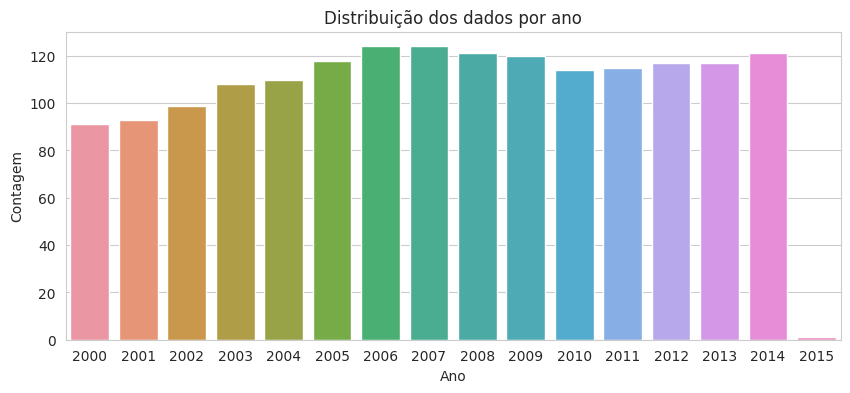

In [ ]:
# Gráfico de contagem para a coluna "ano"
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='ano', order=df['ano'].sort_values().unique())
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Distribuição dos dados por ano')

In [ ]:
# Mapeia os valores a serem substituídos
mapeamento_situacao = {'Developing': 'Desenvolvimento', 'Developed': 'Desenvolvido'}

# Substitui os valores na coluna "situação" pelo mapeamento
df['situacao'] = df['situacao'].replace(mapeamento_situacao)

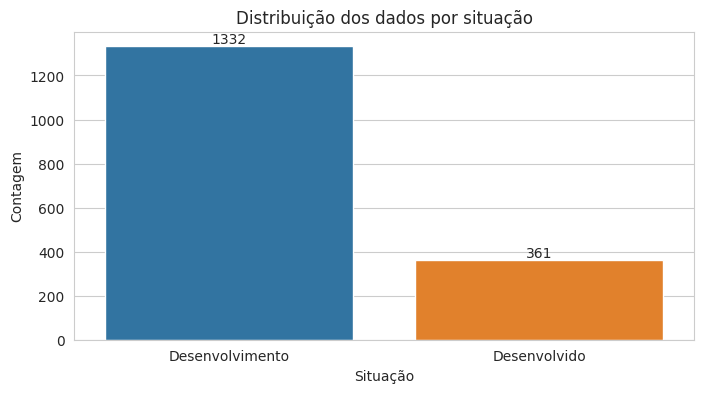

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.countplot(data=df, x='situacao')

plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.title('Distribuição dos dados por situação')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


In [ ]:
quantidade_paises = df['pais'].nunique()

print(f"A quantidade de países distintos é: {quantidade_paises}")

A quantidade de países distintos é: 138


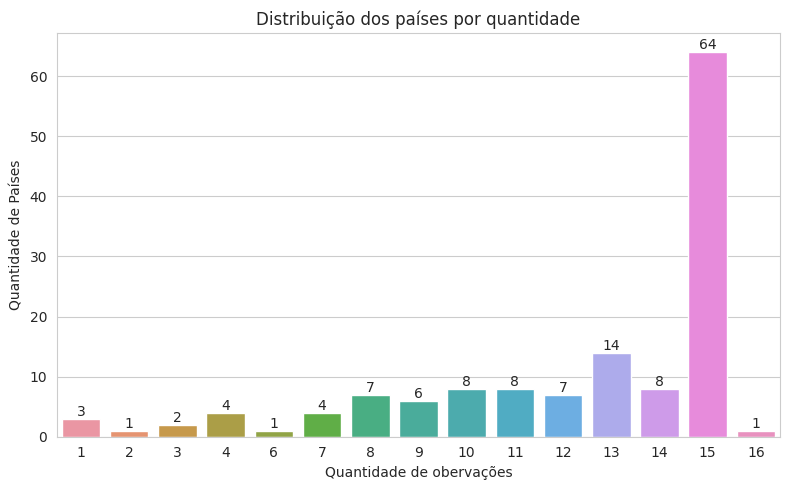

In [ ]:
df_pais = df['pais'].value_counts()

grupo_contagem = df_pais.groupby(df_pais).count()

plt.figure(figsize=(8, 5))
sns.barplot(x=grupo_contagem.index, y=grupo_contagem.values)
plt.xlabel('Quantidade de obervações')
plt.ylabel('Quantidade de Países')
plt.title('Distribuição dos países por quantidade')

for i, v in enumerate(grupo_contagem.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


##Distribuição das variáveis contínuas

###Histogramas

Ao analisar os histogramas podemos observar que nenhum deles aparenta ter uma distribuição normal, conforme teste de normalidade, todos são assimétricos.

A variável alvo do estudo, a expectativa_vida, possui assimetria negativa, cauda mais longa à esquerda. As 3 faixas com maior frequência estão entre 71 e 78 anos.

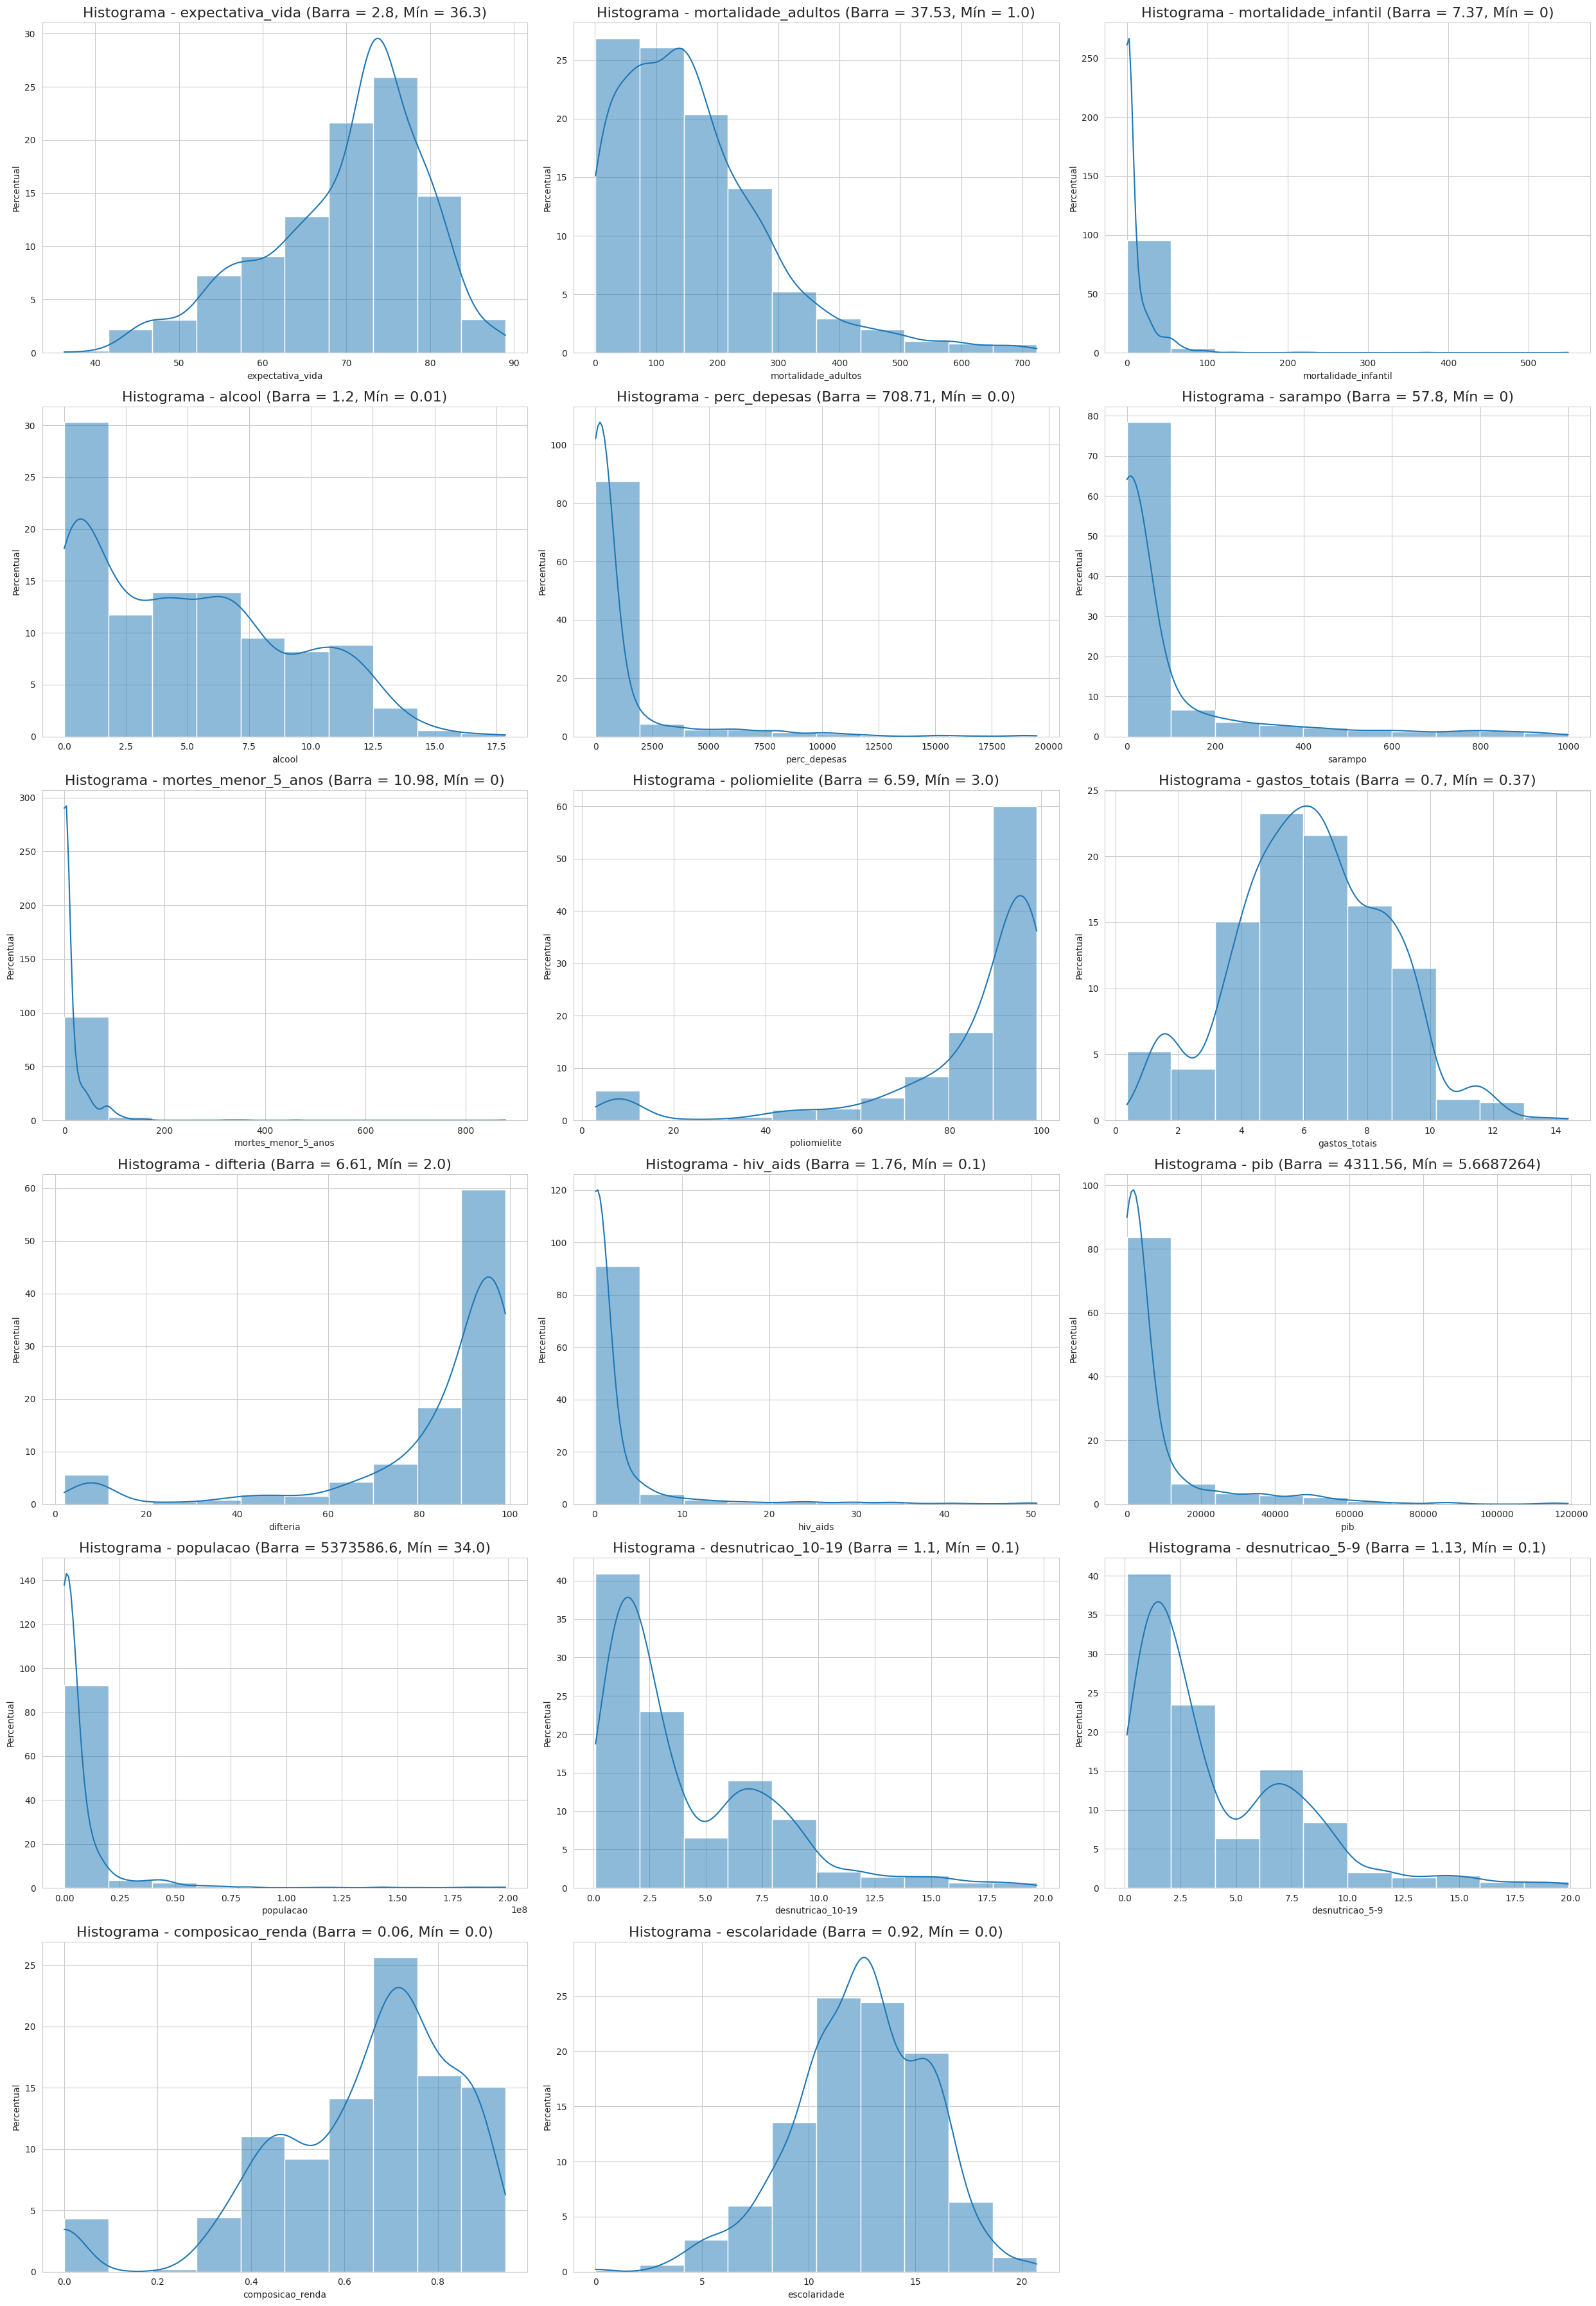

In [ ]:
import warnings
warnings.filterwarnings("ignore")

colunas = df[colunas_numericas].columns
num_cols = len(colunas)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(25, 6*num_rows))
for i, coluna in enumerate(colunas):
    row = i // 3
    col = i % 3

    # Cálculo da largura do bin usando a regra de Scott
    desvio_padrao = np.std(df[coluna])
    n = len(df[coluna])
    binwidth = round(3.5 * desvio_padrao / (n ** (1/3)), 2)
    bins = np.arange(df[coluna].min(), df[coluna].max() + binwidth, binwidth)

    ax = sns.histplot(x=coluna, data=df, ax=axes[row, col], kde = True, weights=np.ones(len(df[coluna])) / len(df[coluna]) * 100)
    ax.set_title('Histograma - {} (Barra = {}, Mín = {})'.format(coluna, binwidth, df[coluna].min()))
    ax.set_ylabel('Percentual')
    ax.title.set_fontsize(16)

# Remover subplots não utilizados
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows-1, j])
plt.tight_layout()
plt.show()

In [ ]:
# Definir o número de bins e as colunas
num_bins = 10
columns = df[colunas_numericas].columns

# Criar um dataframe vazio para armazenar as informações
table = pd.DataFrame()

# Iterar sobre as colunas
for column in columns:
    # Calcular o binwidth usando o cálculo personalizado
    desvio_padrao = np.std(df[column])
    n = len(df[column])
    binwidth = round(3.5 * desvio_padrao / (n ** (1/3)), 2)
    bins = np.arange(df[column].min(), df[column].max() + binwidth, binwidth)
    bins = np.around(bins,2)

    # Calcular a contagem e o percentual por bin
    count, bin_edges = np.histogram(df[column], bins=bins)
    percent = count / len(df) * 100

    # Criar um dataframe temporário com as informações
    temp_df = pd.DataFrame({'Contagem': count, 'Percentual': np.around(percent,2)})

    # Adicionar a coluna de atributo e os valores dos bins
    temp_df['Atributo'] = column
    temp_df['Bins'] = [pd.Interval(left=left, right=right, closed='right') for left, right in zip(bin_edges[:-1], bin_edges[1:])]

    # Adicionar o dataframe temporário à tabela de apoio
    table = pd.concat([table, temp_df])

# Ordenar a tabela por atributo e bins
table = table.sort_values(by=['Atributo', 'Contagem'], ascending=False)

table.reset_index(drop=True, inplace=True)


In [ ]:
for column in columns:
    subset = table[table['Atributo'] == column].head(3)
    print(subset.to_string(index=False, justify='left'))
    print()

 Contagem  Percentual Atributo         Bins        
339       20.02       expectativa_vida (72.7, 75.5]
176       10.40       expectativa_vida (69.9, 72.7]
172       10.16       expectativa_vida (75.5, 78.3]

 Contagem  Percentual Atributo            Bins            
282       16.66       mortalidade_adultos     (1.0, 38.53]
280       16.54       mortalidade_adultos (113.59, 151.12]
218       12.88       mortalidade_adultos (151.12, 188.65]

 Contagem  Percentual Atributo             Bins          
1202      71.00       mortalidade_infantil    (0.0, 7.37]
 131       7.74       mortalidade_infantil  (7.37, 14.74]
 102       6.02       mortalidade_infantil (14.74, 22.11]

 Contagem  Percentual Atributo Bins        
411       24.28       alcool   (0.01, 1.21]
178       10.51       alcool   (3.61, 4.81]
176       10.40       alcool   (1.21, 2.41]

 Contagem  Percentual Atributo     Bins              
1299      76.73       perc_depesas      (0.0, 708.71]
 141       8.33       perc_depesas  

###Teste de normalidade

In [ ]:
def teste_normalidade(dados):
  stat, p = shapiro(dados)
  dados_sem_nulos = dados.dropna()
  stat_sem_nulos, p_sem_nulos = shapiro(dados_sem_nulos)

  alpha = 0.05
  if math.isnan(stat):
    print('Não foi possível calcular o valor da estatística, pois existem dados nulos.')
    print('Cálculo sem os valores nulos: \n- Estatística=%.3f, p-valor=%.6f' % (stat_sem_nulos, p_sem_nulos))
    if p_sem_nulos > alpha:
      print('- A amostra parece ser normal (não podemos rejeitar H0)')
    else:
      print('- A amostra não parece ser normal (rejeitamos H0)')
  else:
    print('Estatística=%.3f, p-valor=%.3f' % (stat, p))
    if p > alpha:
      print('A amostra parece ser normal (não podemos rejeitar H0)')
    else:
      print('A amostra não parece ser normal (rejeitamos H0)')


def teste_normalidade2(dados):
  stat, p = shapiro(dados)
  print('Estatística=%.3f, p-valor=%.10f' % (stat, p))
  alpha = 0.05
  if p > alpha:
      print('A amostra parece ser normal (não podemos rejeitar H0)')
  else:
      print('A amostra não parece ser normal (rejeitamos H0)')

In [ ]:
for col in colunas_numericas:
  print(f'* Coluna {col}')
  teste_normalidade(df[col])
  assimetria = df[col].skew()
  if assimetria<0:
    tx_assimetria = 'negativa, cauda mais longa à esquerda.'
  else:
    tx_assimetria = 'positiva, cauda mais longa à direita.'
  print(f"Assimetria {tx_assimetria} Valor: {round(assimetria,2)}")
  print("\n")

* Coluna expectativa_vida
Estatística=0.955, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)
Assimetria negativa, cauda mais longa à esquerda. Valor: -0.71


* Coluna mortalidade_adultos
Estatística=0.895, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)
Assimetria positiva, cauda mais longa à direita. Valor: 1.38


* Coluna mortalidade_infantil
Estatística=0.413, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)
Assimetria positiva, cauda mais longa à direita. Valor: 9.46


* Coluna alcool
Estatística=0.932, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)
Assimetria positiva, cauda mais longa à direita. Valor: 0.49


* Coluna perc_depesas
Estatística=0.462, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)
Assimetria positiva, cauda mais longa à direita. Valor: 3.9


* Coluna sarampo
Estatística=0.543, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)
Assimetria positiva, cauda mais longa à direita. Valor: 2.

###Boxplot

Existem muito outliers, mas entendemos que é normal diante da variabilidade de países existentes no conjunto de dados.

In [ ]:
def gerar_boxplot(df):
  tipos = ['float64', 'int64']
  colunas_numericas = df.select_dtypes(include=tipos).columns
  colunas = df[colunas_numericas].columns

  num_cols = len(colunas)
  num_rows = (num_cols + 2) // 3

  fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(25, 6*num_rows))


  for i, coluna in enumerate(colunas):
      row = i // 3
      col = i % 3
      sns.boxplot(x=coluna, data=df, ax=axes[row, col]).set(title='Boxplot - ' + coluna)

  # Remover subplots não utilizados
  if num_cols % 3 != 0:
      for j in range(num_cols % 3, 3):
          fig.delaxes(axes[num_rows-1, j])


  plt.tight_layout()
  plt.show()

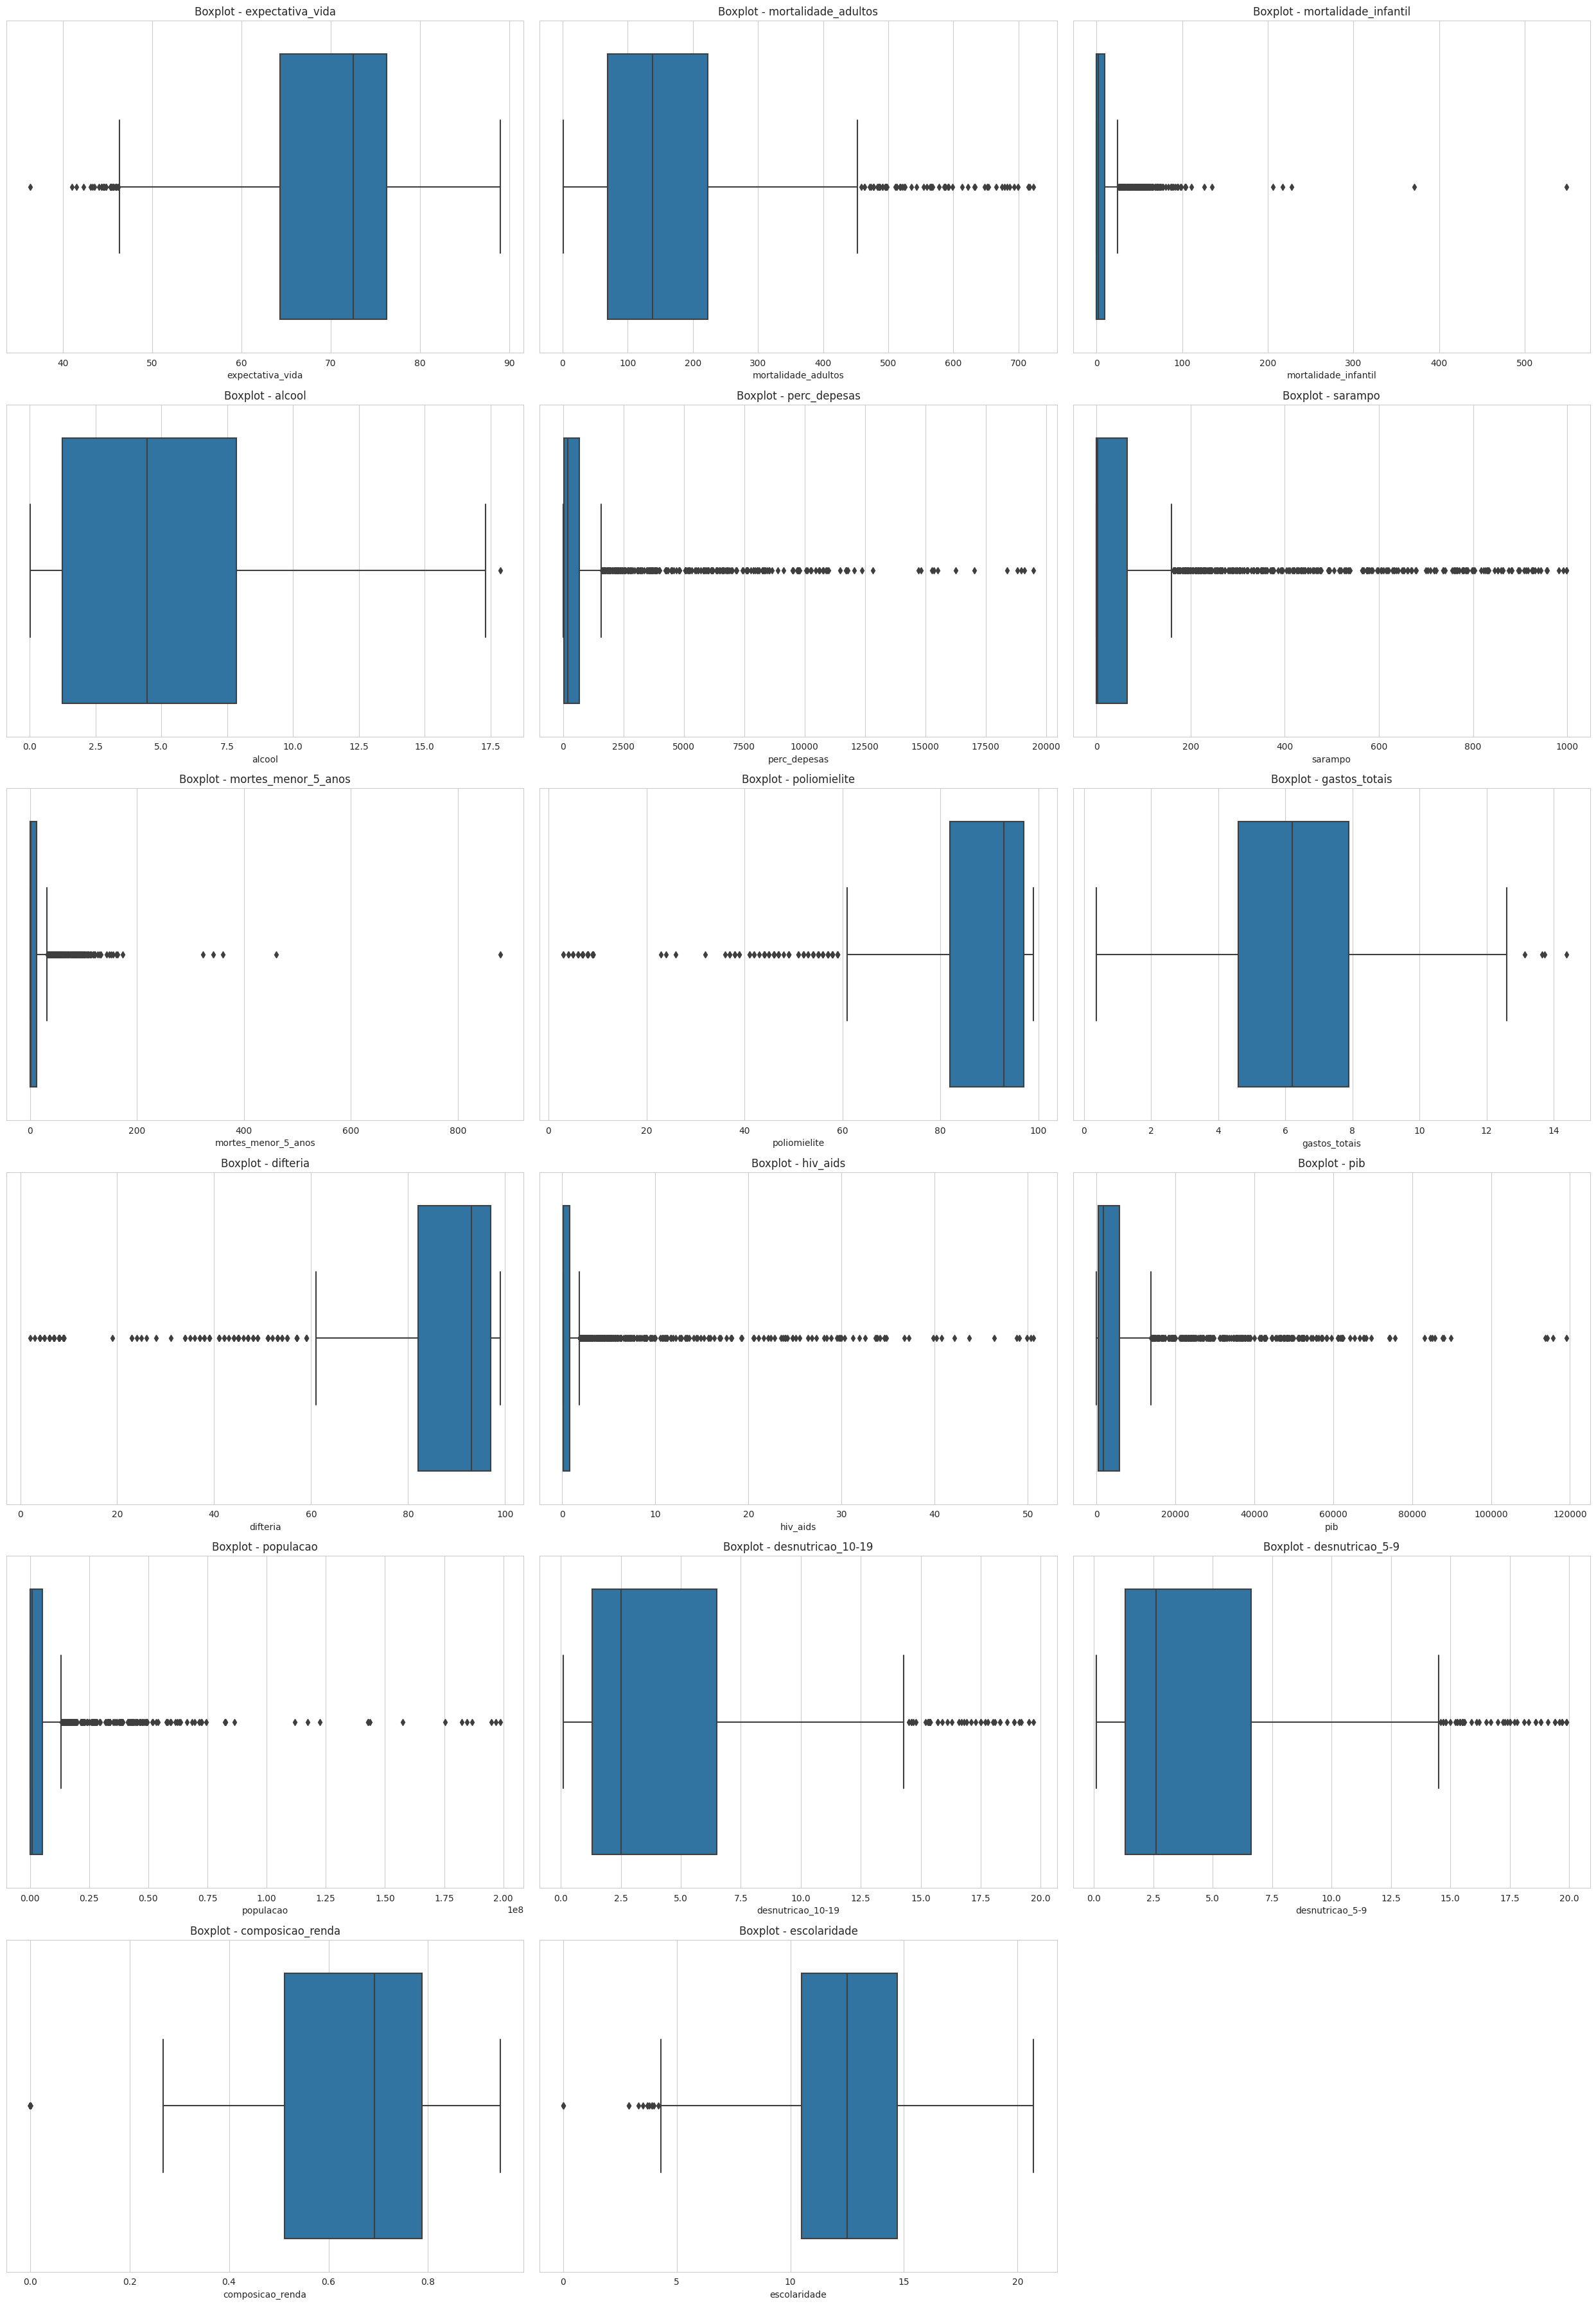

In [ ]:
gerar_boxplot(df)

In [ ]:
resultados = pd.DataFrame(columns=['Atributo', 'Limite Inferior', 'Limite Superior','Países Outliers'])
colunas = df[colunas_numericas].columns
dados_sem_nulos = df.dropna()
for i in colunas:
  q1 = np.percentile(dados_sem_nulos[i], 25)
  q3 = np.percentile(dados_sem_nulos[i], 75)
  iqr = q3 - q1
  limite_inferior = round(q1 - 1.5 * iqr,2)
  limite_superior = round(q3 + 1.5 * iqr,2)
  if i in ['expectativa_vida','hepatite_b','poliomielite','difteria','composicao_renda']:
    paises = dados_sem_nulos[dados_sem_nulos[i] < limite_inferior]['pais'].unique()
  else:
    paises = dados_sem_nulos[dados_sem_nulos[i] > limite_superior]['pais'].unique()#.to_list()
  resultado = pd.DataFrame([[i,limite_inferior,limite_superior, paises]],columns=['Atributo', 'Limite Inferior', 'Limite Superior','Países Outliers'])
  resultados = pd.concat([resultados,resultado], join='inner', ignore_index=True)
resultados

Atributo  Limite Inferior  Limite Superior  \
0       expectativa_vida            46.30            94.30   
1    mortalidade_adultos          -162.00           454.00   
2   mortalidade_infantil           -15.00            25.00   
3                 alcool            -8.64            17.73   
4           perc_depesas          -887.68          1584.65   
5                sarampo           -97.50           162.50   
6    mortes_menor_5_anos           -19.50            32.50   
7           poliomielite            59.50           119.50   
8          gastos_totais            -0.34            12.82   
9               difteria            59.50           119.50   
10              hiv_aids            -0.95             1.85   
11                   pib         -7567.23         13888.91   
12             populacao      -7681949.00      13210659.00   
13     desnutricao_10-19            -6.50            14.30   
14       desnutricao_5-9            -6.65            14.55   
15      composicao_renda             0.10             1.20   
16          escolaridade             4.20            21.00   

                                      Países Outliers  
0   [Botswana, Central African Republic, Eritrea, ...  
1   [Botswana, Central African Republic, Eritrea, ...  
2   [Afghanistan, Angola, Bangladesh, Brazil, Burk...  
3                                           [Estonia]  
4   [Australia, Austria, Belgium, Canada, Chile, C...  
5   [Afghanistan, Albania, Algeria, Angola, Austra...  
6   [Afghanistan, Angola, Bangladesh, Benin, Brazi...  
7   [Afghanistan, Angola, Armenia, Australia, Azer...  
8         [Kiribati, Liberia, Maldives, Sierra Leone]  
9   [Afghanistan, Angola, Australia, Belarus, Beni...  
10  [Angola, Benin, Botswana, Burkina Faso, Burund...  
11  [Australia, Austria, Belgium, Canada, Chile, C...  
12  [Afghanistan, Algeria, Angola, Argentina, Aust...  
13  [Afghanistan, Bangladesh, Bhutan, Maldives, Na...  
14  [Afghanistan, Bangladesh, Bhutan, Maldives, Na...  
15  [Bhutan, Bosnia and Herzegovina, Burkina Faso,...  
16                                                 []

Verifica Dados Negativos

In [ ]:
def verifica_negativos(df):
  return (df < 0).any().any()

In [ ]:
if verifica_negativos(df[colunas_numericas]):
  print(f'tem valores negativos')
else:
   print(f'Não tem valores negativos')

Não tem valores negativos


##Transformação dos dados

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,\
FunctionTransformer,RobustScaler,Normalizer, MaxAbsScaler, QuantileTransformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import mstats
from scipy import stats
from sklearn.preprocessing import scale

cols_transf_log = ['expectativa_vida','alcool','composicao_renda', 'mortalidade_infantil']
cols_transf_robust =['mortalidade_adultos', 'perc_depesas', 'sarampo',
       'mortes_menor_5_anos', 'poliomielite', 'gastos_totais', 'difteria',
       'hiv_aids', 'pib', 'populacao', 'desnutricao_10-19', 'desnutricao_5-9',
       'escolaridade']
categorical_features = ['situacao']


#df_tratado['expectativa_vida_winsorize'] = mstats.winsorize(df_tratado['expectativa_vida'].values, limits=(0.05, 0.00))
#df_tratado['expectativa_vida_boxcox'], lambda_param = stats.boxcox(df_tratado['expectativa_vida'])
#df_tratado["expectativa_vida_log"] = np.log(df_tratado['expectativa_vida'])
#df_tratado['expectativa_vida_raiz_quadrada'] = np.sqrt(df_tratado['expectativa_vida'])
#df_tratado['expectativa_vida_exponencial'] = np.exp(df_tratado['expectativa_vida'])
#df_tratado['expectativa_vida_inversa'] = 1 / df_tratado['expectativa_vida']
#df_tratado['expectativa_vida_raiz_cubica'] = np.cbrt(df_tratado['expectativa_vida'])
#df_tratado['expectativa_vida_log_duplo'] = np.log1p(np.log1p(df_tratado['expectativa_vida']))
#df_tratado['expectativa_vida_power'] = np.power(df_tratado['expectativa_vida'], 0.25)  # Transformação de potência

#media = np.mean(df_tratado['expectativa_vida'])
#desvio_padrao = np.std(df_tratado['expectativa_vida'])
#df_tratado['expectativa_vida_z_score'] = (df_tratado['expectativa_vida'] - media) / desvio_padrao

#df_tratado['expectativa_vida_scale'] = scale(df_tratado['expectativa_vida'])


###############################################################
#copia para usar no simulador
###############################################################
df_simulador = df
preprocessor_simulador = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), categorical_features)
])
pipeline_simulador = Pipeline(steps=[('preprocessor', preprocessor_simulador)])
df_pipeline_simulador = preprocessor_simulador.fit_transform(df_simulador)

###############################################################



###############################################################
# Transformação
###############################################################

preprocessor = ColumnTransformer(transformers=[
    ('normalization_zscore', FunctionTransformer(np.log1p), cols_transf_log),
    ('robust', StandardScaler(), cols_transf_robust),
    ('onehot', OneHotEncoder(), categorical_features)
    #('target', RobustScaler(), ['expectativa_vida']),
    #('target2', MinMaxScaler(), ['expectativa_vida']),
    #('target3', StandardScaler(), ['expectativa_vida']),
    #('target4', MaxAbsScaler(), ['expectativa_vida']),
    #('target5', QuantileTransformer(), ['expectativa_vida'])
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
df_pipeline = preprocessor.fit_transform(df)


def df_converter(df_original,df_aux):

  column_names = cols_transf_log + cols_transf_robust + ['situacao_0','situacao_1'] # cols_transf_robust +
  df_aux = pd.DataFrame(df_aux, columns=column_names)
  df_ano_pais = df_original[['ano', 'pais']]
  df_final = pd.concat([df_ano_pais, df_aux], axis=1)
  return df_final

df = df_converter(df,df_pipeline)

####################################################
# Converter e adicionar colunas ao df_simulador
#df = df_converter(df_simulador,df_pipeline_simulador)
column_names = ['situacao_0','situacao_1'] # cols_transf_robust +
df_aux = pd.DataFrame(df_pipeline_simulador, columns=column_names)
df_final = pd.concat([df_simulador, df_aux], axis=1)

In [ ]:
df_simulador = df_final

##Variável independente - Expectativa de Vida

Os dados da expectativa de vida não seguem uma distribuição normal, mesmo após a transformação logarítimica:

In [ ]:
teste_normalidade(df['expectativa_vida'])


Estatística=0.920, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)


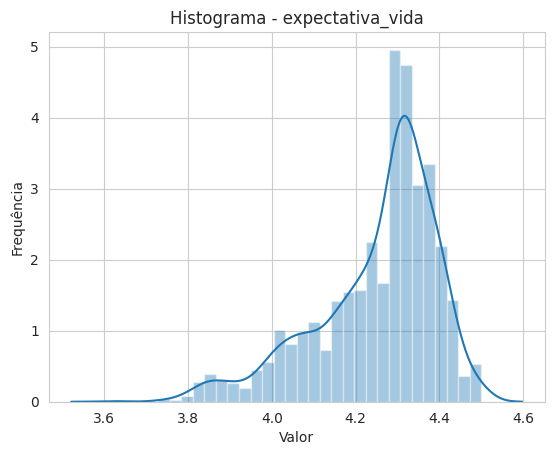

In [ ]:
colunas_expectativa_vida = [coluna for coluna in df.columns if coluna.startswith('expectativa_vida')]

for coluna in colunas_expectativa_vida:
    ax = sns.distplot(df[coluna])
    ax.set_title(f'Histograma - {coluna}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')
    plt.show()

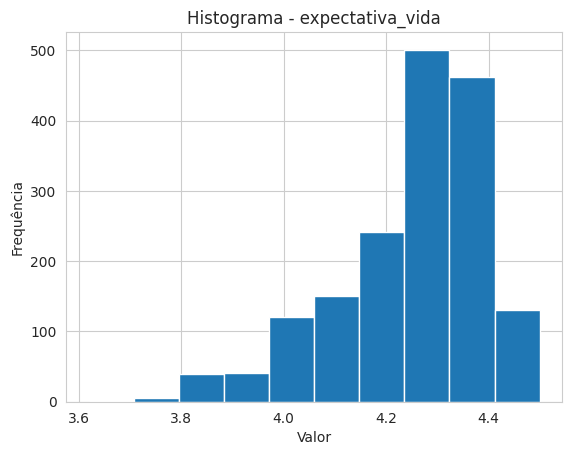

In [ ]:
colunas_expectativa_vida = [coluna for coluna in df.columns if coluna.startswith('expectativa_vida')]

# Gerar o histograma para cada coluna
for coluna in colunas_expectativa_vida:
    plt.hist(df[coluna], bins=10)  # Defina o número de bins desejado
    plt.title(f'Histograma - {coluna}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.show()

<Axes: xlabel='expectativa_vida'>

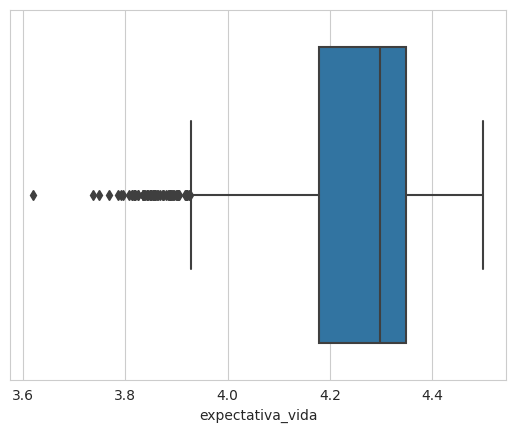

In [ ]:
sns.boxplot(x=df['expectativa_vida'])

In [ ]:
df.describe()

expectativa_vida       alcool  composicao_renda  mortalidade_infantil  \
count       1693.000000  1693.000000       1693.000000           1693.000000   
mean           4.251674     1.504709          0.486230              1.403681   
std            0.144383     0.840161          0.141898              1.360504   
min            3.618993     0.009950          0.000000              0.000000   
25%            4.178992     0.810930          0.412772              0.000000   
50%            4.297285     1.695616          0.525911              1.098612   
75%            4.347694     2.179287          0.581098              2.397895   
max            4.499810     2.937573          0.665262              6.309918   

       mortalidade_adultos  perc_depesas       sarampo  mortes_menor_5_anos  \
count         1.693000e+03  1.693000e+03  1.693000e+03         1.693000e+03   
mean          8.393889e-17  4.616639e-17 -6.295417e-18        -1.259083e-17   
std           1.000295e+00  1.000295e+00  1.000295e+00         1.000295e+00   
min          -1.258969e+00 -4.281389e-01 -4.752681e-01        -4.010270e-01   
25%          -7.268322e-01 -4.117936e-01 -4.752681e-01        -4.010270e-01   
50%          -1.868700e-01 -3.538974e-01 -4.600256e-01        -3.475293e-01   
75%           4.783009e-01 -1.556834e-01 -1.450149e-01        -5.329225e-02   
max           4.391071e+00  7.643620e+00  4.600469e+00         2.311119e+01   

       poliomielite  gastos_totais      difteria     hiv_aids           pib  \
count  1.693000e+03   1.693000e+03  1.693000e+03  1693.000000  1.693000e+03   
mean  -2.287335e-16   3.420510e-16 -1.909610e-16     0.000000  5.456028e-17   
std    1.000295e+00   1.000295e+00  1.000295e+00     1.000295  1.000295e+00   
min   -3.604862e+00  -2.462187e+00 -3.636945e+00    -0.323161 -5.156573e-01   
25%   -8.258767e-02  -6.776021e-01 -8.545703e-02    -0.323161 -4.834305e-01   
50%    4.078556e-01  -2.581664e-03  4.028726e-01    -0.323161 -3.907383e-01   
75%    5.861986e-01   7.104087e-01  5.804470e-01    -0.206449 -1.180826e-01   
max    6.753701e-01   3.452679e+00  6.692342e-01     8.096759  7.600890e+00   

          populacao  desnutricao_10-19  desnutricao_5-9  escolaridade  \
count  1.693000e+03       1.693000e+03     1.693000e+03  1.693000e+03   
mean   1.049236e-17      -1.007267e-16     1.678778e-17 -3.357556e-17   
std    1.000295e+00       1.000295e+00     1.000295e+00  1.000295e+00   
min   -3.709461e-01      -1.075812e+00    -1.064388e+00 -3.974182e+00   
25%   -3.625986e-01      -7.569019e-01    -7.511764e-01 -6.179320e-01   
50%   -3.171026e-01      -4.379915e-01    -4.118643e-01  2.135357e-02   
75%   -7.715691e-02       6.250429e-01     6.321728e-01  7.245678e-01   
max    1.048715e+01       4.133057e+00     4.103596e+00  2.642425e+00   

        situacao_0   situacao_1  
count  1693.000000  1693.000000  
mean      0.213231     0.786769  
std       0.409710     0.409710  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       0.000000     1.000000  
75%       0.000000     1.000000  
max       1.000000     1.000000

###Correlações

<Axes: >

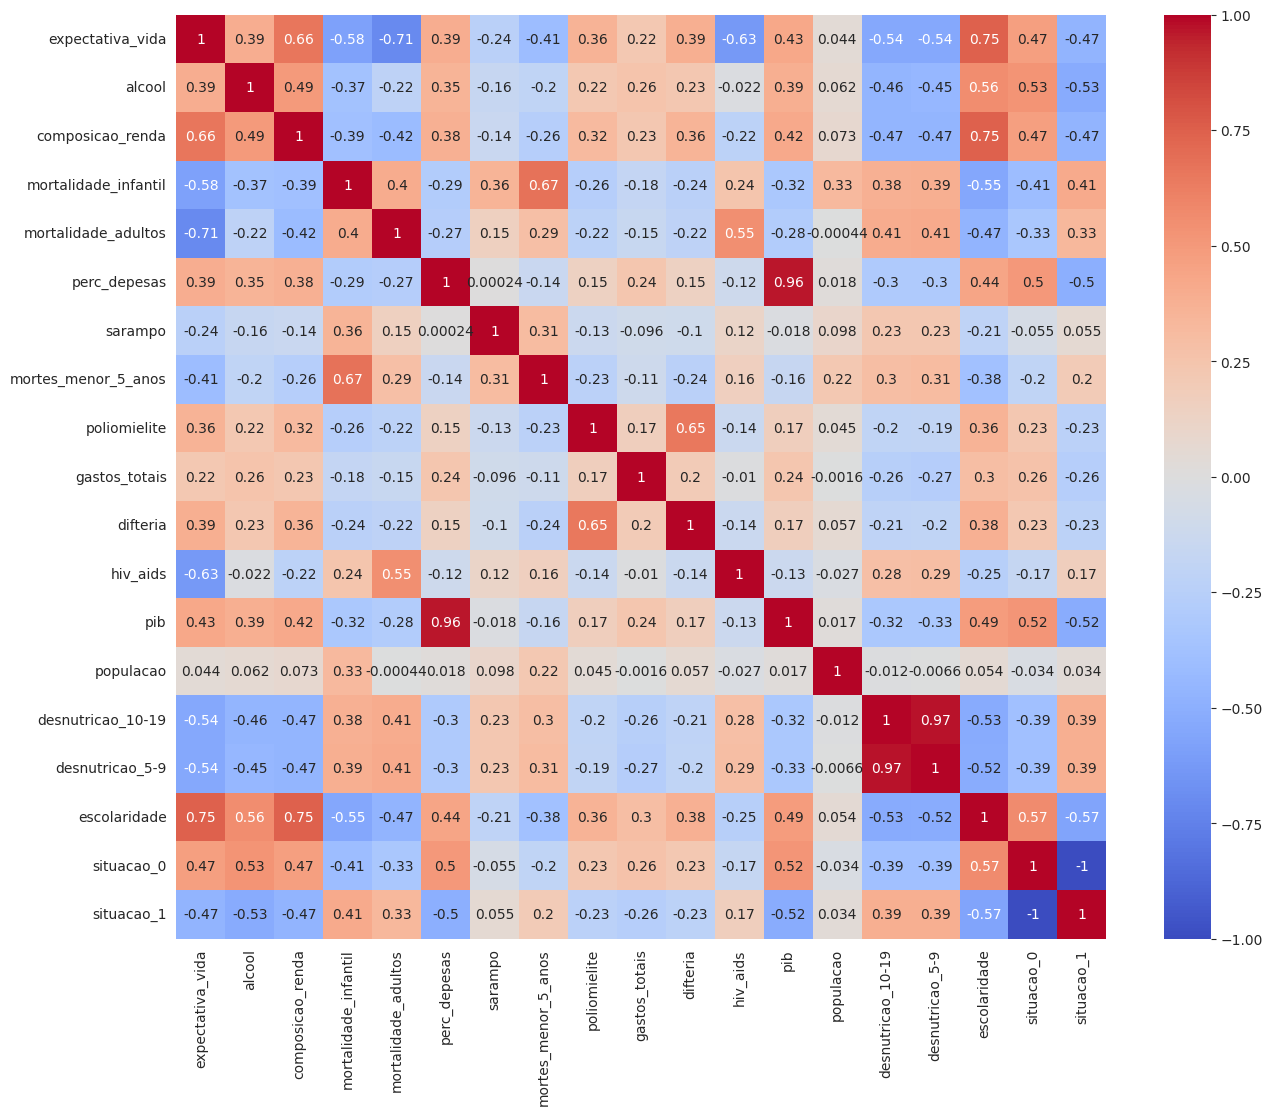

In [ ]:
ax = plt.subplots(figsize= (15, 12))
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
corr_expectativa_vida = df.corr()['expectativa_vida'].sort_values()
print(corr_expectativa_vida.round(2))

mortalidade_adultos    -0.71
hiv_aids               -0.63
mortalidade_infantil   -0.58
desnutricao_5-9        -0.54
desnutricao_10-19      -0.54
situacao_1             -0.47
mortes_menor_5_anos    -0.41
sarampo                -0.24
populacao               0.04
gastos_totais           0.22
poliomielite            0.36
difteria                0.39
alcool                  0.39
perc_depesas            0.39
pib                     0.43
situacao_0              0.47
composicao_renda        0.66
escolaridade            0.75
expectativa_vida        1.00
Name: expectativa_vida, dtype: float64


Os atributos mais correlacionados com a expectativa de vida são **escolaridade, composicao_renda e mortalidade_adultos**.

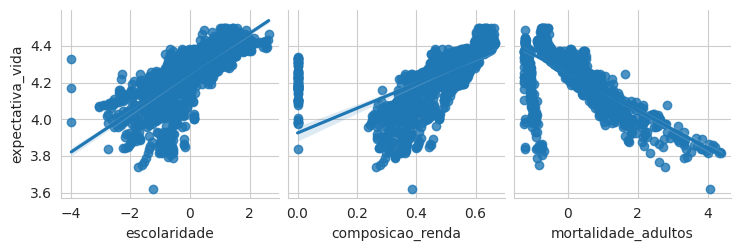

In [ ]:
#Destacando os atributos mais correlacionados com o target
sns.pairplot(df, y_vars='expectativa_vida', kind='reg',
                         x_vars=['escolaridade', 'composicao_renda' ,'mortalidade_adultos'])

#Funções

##Funções de teste

In [ ]:
def show_f_prob(dados):
  return (dados.f_pvalue <= 0.05, dados.f_pvalue)

In [ ]:
# substituida pela funcao show_f_prob
#def teste_f_pvalor(dados,X,Y):
#  p_valor = f.pdf(dados.f_pvalue, len(X) - 1, len(Y) - 1)
#  return p_valor <= 0.05

In [ ]:
#from scipy.stats import normaltest
def test_residuos_omnibus(dataset):
  statistic, p_valor = normaltest(dataset.resid)
  return (p_valor <= 0.05, p_valor)

In [ ]:
def show_probplot(dataset):
  (_, (_, _, _)) = probplot(dataset.resid, plot = plt)

In [ ]:
#from scipy.stats import skew
def show_skew(dataset):
  S = skew(dataset.resid)
  return S

In [ ]:
#from scipy.stats import kurtosis
def show_kurtosis(dataset):
  C = 3 + kurtosis(dataset.resid)
  return C

In [ ]:
def show_JB(N, S, C):
  JB = (N / 6.) * (S ** 2 + (1 / 4.) * (C - 3) ** 2)
  return JB

In [ ]:
def show_JB_pvalor(JB):
  from scipy.stats import chi2
  p_valor = chi2.sf(JB, 2)
  return p_valor <= 0.05

In [ ]:
def teste_r2(dados):
  return dados.rsquared

In [ ]:
def teste_r2_adj(dados):
  return dados.rsquared_adj

In [ ]:
def show_pvalues (dados):
  valores_not_ok = ", ".join(list(dados.pvalues[dados.pvalues > 0.05].index))
  valores_ok = ", ".join(list(dados.pvalues[dados.pvalues <= 0.05].index))
  return (valores_ok , valores_not_ok)

In [ ]:
def teste_Breusch_Pagan(dados):
  _, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(dados.resid, dados.model.exog)
  return (p_value > 0.05, p_value)

In [ ]:
def teste_white(dados):
  resultado_teste_white = smd.het_white(dados.resid, dados.model.exog)
  return (resultado_teste_white[1] > 0.05, resultado_teste_white[1])

In [ ]:
def teste_durbin_watson(dados):
  resultado_dw = durbin_watson(dados.resid)
  return (1.5 > resultado_dw > 2.5, resultado_dw)

In [ ]:
def teste_aic_bic(dados):
  resultado_aic = dados.aic
  resultado_bic = dados.bic
  return resultado_aic, resultado_bic


##Criação do dataframe de resultado

In [ ]:
colunas_resultado = ['modelo','registros', 'simetria', 'curtose', 'jaquebera',
           'p_jaquebera', 'p_fstatistic', 'rsquared', 'rsquared_adj',
           'pvalues_ok', 'pvalues_nok', 'omnibus', 'pagan', 'white',
           'durbin_watson','aic','bic', 'X_test', 'y_test']
df_r = pd.DataFrame(columns=colunas_resultado)

In [ ]:
df_r

Empty DataFrame
Columns: [modelo, registros, simetria, curtose, jaquebera, p_jaquebera, p_fstatistic, rsquared, rsquared_adj, pvalues_ok, pvalues_nok, omnibus, pagan, white, durbin_watson, aic, bic, X_test, y_test]
Index: []

##Teste de hipótese

In [ ]:
def teste_hipotese(dados, X_test, y_test):

  print(90*"-")
  print(30*"-")
  print("AJUSTE GERAL DO MODELO")
  print(30*"-")

  print(30*"-")
  n = int(dados.nobs)
  print(f"Existem {n} registros")
  print(30*"-")

  r2 = teste_r2(dados)
  print(f"[R-Squared] O R² tem o valor: {r2}.")

  r2_adj = teste_r2_adj(dados)
  print(f"[R-Squared Ajustado] O R² ajustado tem o valor: {r2_adj}.")

  f_prob = show_f_prob(dados)
  if f_prob[0]:
    print(f'[F-statistic p-valor] O p-valor do F é {f_prob[1]} e indica ser normal (não podemos rejeitar H0)')
  else:
    print(f'[F-statistic p-valor] O p-valor do F é {f_prob[1]} e indica NÃO ser normal(rejeitamos H0)')

  s = show_skew(dados)
  print(f"[Skew] A simetria(skew) tem o valor: {s}. Verificar o skewtest")
  c = show_kurtosis(dados)
  print(f"[Kurtosis] O achatamento(kurtosis) tem o valor: {c}. Verificar o kurtosistest")

  aic, bic = teste_aic_bic(dados)
  print(f'[AIC] valor {aic}')
  print(f'[BIC] valor {bic}')

  print(30*"-")
  print("[P> t] - Ajuste pontuais dos parâmetros do modelo")
  print(30*"-")

  ok, nok = show_pvalues(dados)
  if len(nok) > 0:
    print(f"[P> t] Valores irregulares: {nok}")

  if len(ok) > 0:
    print(f"[P> t] Valores regulares: {ok}")

  print(30*"-")
  print("TESTES DE RESÍDUOS")
  print(30*"-")

  print(30*"-")
  print("Homocedasticidade")
  print(30*"-")

  test_omnibus = test_residuos_omnibus(dados)
  if test_omnibus[0]:
      print(f'[Omnibus] Os residuos parecem ser normal, pois o valor {test_omnibus[1]} é menor ou igual a 0.05) (não podemos rejeitar H0)')
  else:
      print(f'[Omnibus] Os residuos não parecem ser normal, pois o valor {test_omnibus[1]} é maior que 0.05) (rejeitamos H0)')

  jb = show_JB(n, s, c)
  print(f"[Jaques-Bera] O Teste Jaques-Bera tem o valor: {jb}.")

  if show_JB_pvalor(jb):
      print('[Jaques-Bera p-valor] O p-valor do Teste Jaques-Bera indica que os resíduos parecem ser normal (não podemos rejeitar H0)')
  else:
      print('[Jaques-Bera p-valor] O p-valor do Teste Jaques-Bera indica que os resíduos não parecem ser normal (rejeitamos H0)')

  Breusch_Pagan = teste_Breusch_Pagan(dados)
  if Breusch_Pagan[0]:
    print(f'[Breusch-Pagan p-valor] os redíduos parecem ter homocedasticidade, pois o valor {Breusch_Pagan[1]} é maior que 0.05')
  else:
    print(f'[Breusch-Pagan p-valor] os redíduos parecem NÃO ter homocedasticidade, pois o valor {Breusch_Pagan[1]} é menor ou igual a 0.05')

  try:
    white = teste_white(dados)
    if(white[0]):
      print(f'[White p-valor] os redíduos parecem ter homocedasticidade, pois o valor {white[1]} é maior que 0.05')
    else:
      print(f'[White p-valor] os redíduos parecem ter NÃO homocedasticidade, pois o valor {white[1]} é menor ou igual a 0.05')
  except:
    white = -999
    print("Erro ao executar teste White")

  print(30*"-")
  print("Autocorrelação entre os resíduos")
  print(30*"-")

  dw = teste_durbin_watson(dados)
  if(dw[0]):
    print(f'[Durbin_Watson] Parece NÃO existir autocorrelação entre os redíduos, pois o valor {dw[1]} está entre 1,5 e 2,5')
  else:
    print(f'[Durbin_Watson] Parece existir autocorrelação entre os redíduos, pois o valor {dw[1]} está fora do intervalo de 1,5 e 2,5')

  print(90*"-")

#teste_f_pvalor(dados)
  lista = [[dados, dados.nobs, s, c, jb, \
                show_JB_pvalor(jb), f_prob[0], r2, r2_adj, ok, nok, \
                test_residuos_omnibus(dados), Breusch_Pagan[0], white[0],\
                dw[0], aic, bic, X_test, y_test]]
  df_aux = pd.DataFrame(lista, columns=colunas_resultado)


  show_probplot(dados)
  #return pd.concat([df_r, df_aux], ignore_index=True)
  #return df_r.append(df_aux)
  return df_aux

#Regressão Linear - Simples

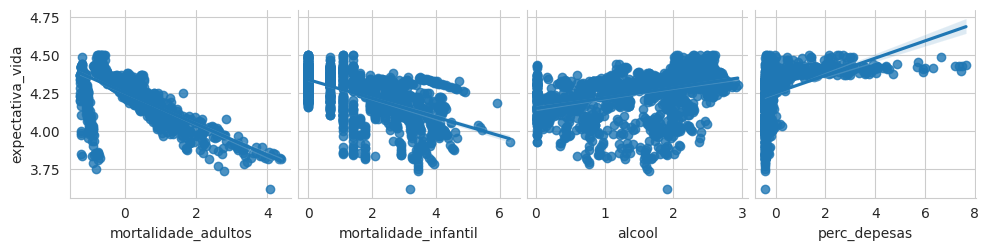

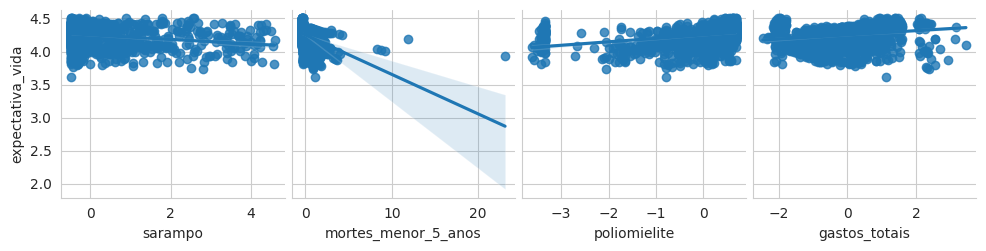

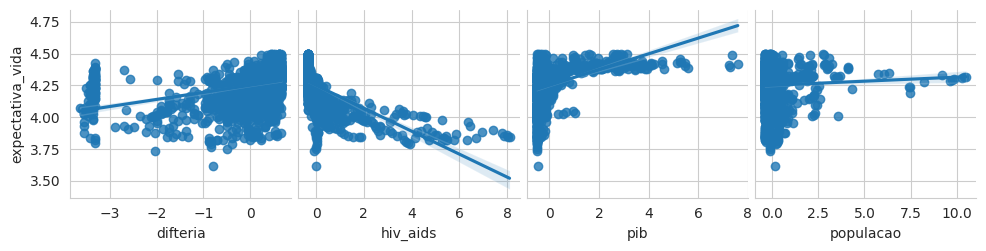

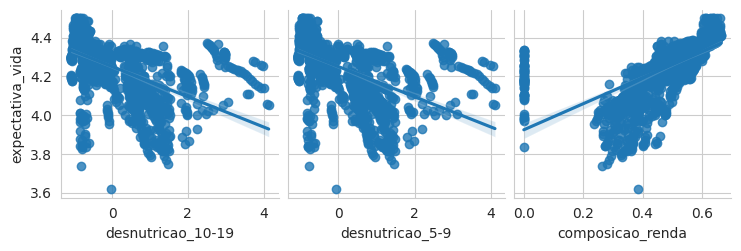

In [ ]:
sns.pairplot(data=df, y_vars=['expectativa_vida'], x_vars=colunas_numericas[1:5], kind='reg')
sns.pairplot(data=df, y_vars=['expectativa_vida'], x_vars=colunas_numericas[5:9], kind='reg')
sns.pairplot(data=df, y_vars=['expectativa_vida'], x_vars=colunas_numericas[9: 13], kind='reg')
sns.pairplot(data=df, y_vars=['expectativa_vida'], x_vars=colunas_numericas[13: 16], kind='reg')
#sns.pairplot(data=df, y_vars=['expectativa_vida'], x_vars=colunas_numericas[17:], kind='reg')

Geramos o modelo de regressão linear simples para as 3 variáveis mais correlacionadas com a expectativa de vida.

In [ ]:
X = df[['mortalidade_adultos']]
y = df["expectativa_vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     1418.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          8.43e-213
Time:                        20:09:22   Log-Likelihood:                 1186.6
No. Observations:                1354   AIC:                            -2369.
Df Residuals:                    1352   BIC:                            -2359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2517    

------------------------------------------------------------------------------------------
------------------------------
AJUSTE GERAL DO MODELO
------------------------------
------------------------------
Existem 1354 registros
------------------------------
[R-Squared] O R² tem o valor: 0.5118795231981594.
[R-Squared Ajustado] O R² ajustado tem o valor: 0.5115184873425367.
[F-statistic p-valor] O p-valor do F é 8.428539731178039e-213 e indica ser normal (não podemos rejeitar H0)
[Skew] A simetria(skew) tem o valor: -2.2048246160228815. Verificar o skewtest
[Kurtosis] O achatamento(kurtosis) tem o valor: 10.172747499000574. Verificar o kurtosistest
[AIC] valor -2369.160803361176
[BIC] valor -2358.7391664542315
------------------------------
[P> t] - Ajuste pontuais dos parâmetros do modelo
------------------------------
[P> t] Valores regulares: const, mortalidade_adultos
------------------------------
TESTES DE RESÍDUOS
------------------------------
------------------------------
H

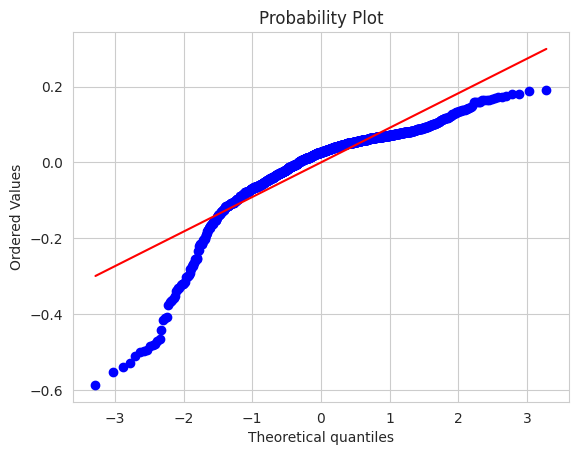

In [ ]:
df_r = df_r.append(teste_hipotese(modelo_statsmodels, X_test, y_test), ignore_index=True)

In [ ]:
X = df[['composicao_renda']]
y = df["expectativa_vida"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     1045.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          2.57e-170
Time:                        20:09:22   Log-Likelihood:                 1088.7
No. Observations:                1354   AIC:                            -2173.
Df Residuals:                    1352   BIC:                            -2163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.9221      0.011  

------------------------------------------------------------------------------------------
------------------------------
AJUSTE GERAL DO MODELO
------------------------------
------------------------------
Existem 1354 registros
------------------------------
[R-Squared] O R² tem o valor: 0.4359433907839668.
[R-Squared Ajustado] O R² ajustado tem o valor: 0.43552618914993124.
[F-statistic p-valor] O p-valor do F é 2.5726598096594474e-170 e indica ser normal (não podemos rejeitar H0)
[Skew] A simetria(skew) tem o valor: -0.3345583223806535. Verificar o skewtest
[Kurtosis] O achatamento(kurtosis) tem o valor: 6.456272440675049. Verificar o kurtosistest
[AIC] valor -2173.3827434045947
[BIC] valor -2162.9611064976502
------------------------------
[P> t] - Ajuste pontuais dos parâmetros do modelo
------------------------------
[P> t] Valores regulares: const, composicao_renda
------------------------------
TESTES DE RESÍDUOS
------------------------------
------------------------------
Ho

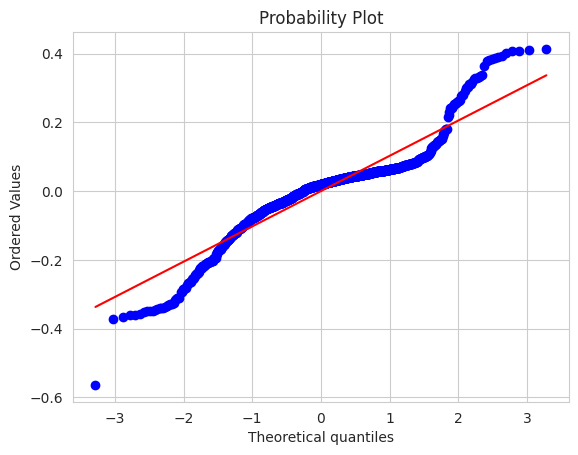

In [ ]:
df_r = df_r.append(teste_hipotese(modelo_statsmodels, X_test, y_test), ignore_index=True)

In [ ]:
X = df[['escolaridade']]
y = df["expectativa_vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True,
                            #missing='drop'
                            ).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1691.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          1.78e-240
Time:                        20:09:23   Log-Likelihood:                 1250.4
No. Observations:                1354   AIC:                            -2497.
Df Residuals:                    1352   BIC:                            -2486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2525      0.003   1627.030   

------------------------------------------------------------------------------------------
------------------------------
AJUSTE GERAL DO MODELO
------------------------------
------------------------------
Existem 1354 registros
------------------------------
[R-Squared] O R² tem o valor: 0.5557633416859551.
[R-Squared Ajustado] O R² ajustado tem o valor: 0.5554347642759595.
[F-statistic p-valor] O p-valor do F é 1.782380875434085e-240 e indica ser normal (não podemos rejeitar H0)
[Skew] A simetria(skew) tem o valor: -1.1553907327594286. Verificar o skewtest
[Kurtosis] O achatamento(kurtosis) tem o valor: 6.215694316886609. Verificar o kurtosistest
[AIC] valor -2496.7141288619346
[BIC] valor -2486.29249195499
------------------------------
[P> t] - Ajuste pontuais dos parâmetros do modelo
------------------------------
[P> t] Valores regulares: const, escolaridade
------------------------------
TESTES DE RESÍDUOS
------------------------------
------------------------------
Homocedast

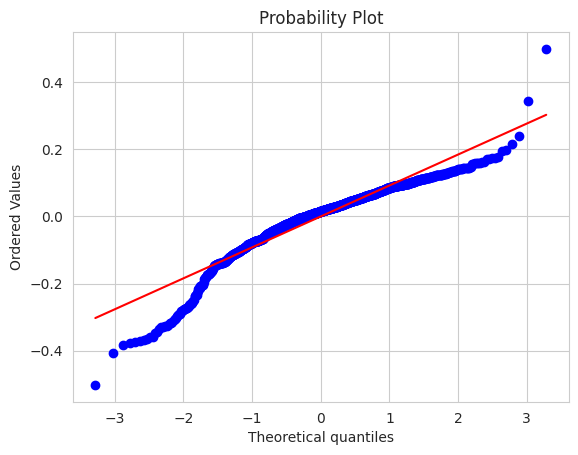

In [ ]:
df_r = df_r.append(teste_hipotese(modelo_statsmodels, X_test, y_test), ignore_index=True)

O modelo gerado apenas com a escolaridade explica aproximadamente 56 % da variabilidade observada.

O coeficiente da variável "escolaridade" é de 0,1073, o que significa que um aumento de uma unidade na variável "escolaridade" está associado a um aumento de 0.1073 unidades na expectativa de vida, mantendo todas as outras variáveis constantes. O coeficiente da constante é de 4.2525, representando o valor esperado da expectativa de vida quando todas as variáveis independentes são zero.

Expectativa de Vida = 4.2525 + 0.1073 * Escolaridade

In [ ]:
df_r

modelo  registros  simetria  \
0  <statsmodels.regression.linear_model.Regressio...     1354.0 -2.204825   
1  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.334558   
2  <statsmodels.regression.linear_model.Regressio...     1354.0 -1.155391   

     curtose    jaquebera p_jaquebera p_fstatistic  rsquared  rsquared_adj  \
0  10.172747  3999.564410        True         True  0.511880      0.511518   
1   6.456272   699.202004        True         True  0.435943      0.435526   
2   6.215694   884.635952        True         True  0.555763      0.555435   

                   pvalues_ok pvalues_nok                         omnibus  \
0  const, mortalidade_adultos              (True, 5.758755904908227e-143)   
1     const, composicao_renda                (True, 6.87881995228533e-31)   
2         const, escolaridade              (True, 1.1517505024572792e-67)   

   pagan  white durbin_watson          aic          bic  \
0  False  False         False -2369.160803 -2358.739166   
1  False  False         False -2173.382743 -2162.961106   
2  False  False         False -2496.714129 -2486.292492   

                                              X_test  \
0        mortalidade_adultos
1263            -1.1...   
1        composicao_renda
1263          0.574927
...   
2        escolaridade
1263      0.980282
1685    ...   

                                              y_test  
0  1263    4.351567
1685    3.895894
1556    4.29...  
1  1263    4.351567
1685    3.895894
1556    4.29...  
2  1263    4.351567
1685    3.895894
1556    4.29...

##Análise de Resíduos da Escolaridade

In [ ]:
#Calculando os resíduos
y_pred = modelo_statsmodels.predict(X_train_com_constante)
residuos = y_train - y_pred

In [ ]:
#outra forma
residuos = modelo_statsmodels.resid

In [ ]:
residuos

1385   -0.027986
752     0.009124
408     0.091656
1653    0.032255
1216    0.048982
          ...   
1130    0.060215
1294    0.043593
860    -0.032807
1459   -0.214998
1126   -0.031617
Length: 1354, dtype: float64

Text(0.5, 0, 'escolaridade')

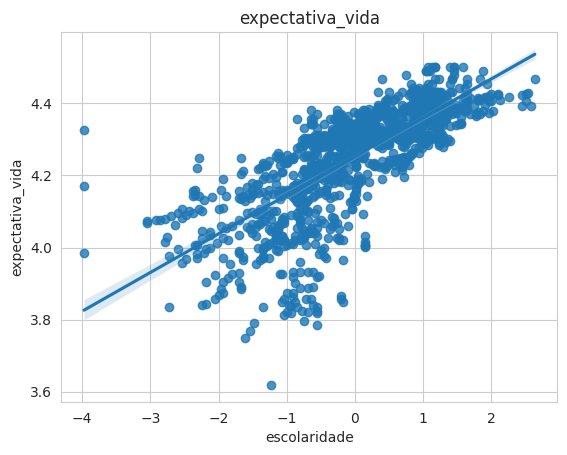

In [ ]:
ax = sns.regplot(x=X_train["escolaridade"], y=y_train)
ax.set_title("expectativa_vida")
plt.ylabel('expectativa_vida')
plt.xlabel('escolaridade')

<Axes: ylabel='Density'>

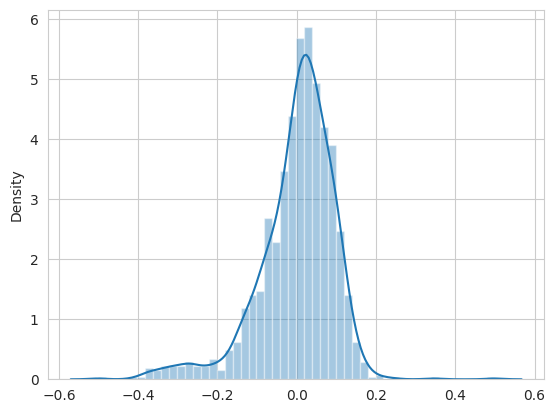

In [ ]:
sns.distplot(residuos)

Text(0.5, 0, 'escolaridade')

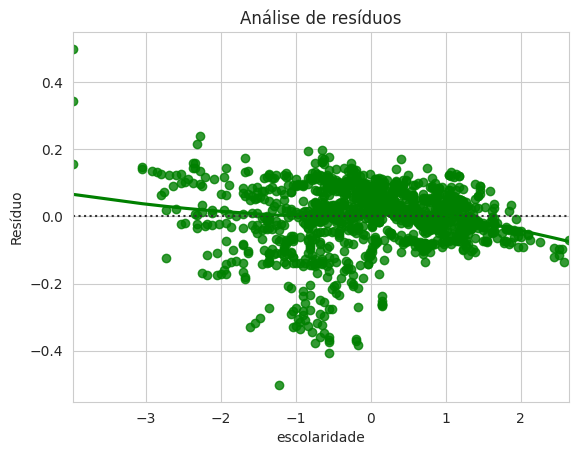

In [ ]:
ax_residual = sns.residplot(x=X_train["escolaridade"], y=residuos, lowess=True, color="g")
ax_residual.set_title("Análise de resíduos")
plt.ylabel('Resíduo')
plt.xlabel('escolaridade')

#Regressão Linear Múltipla

Vamos gerar agora um modelo com todas as variáveis.

In [ ]:
tipos = ['float64', 'int64']
colunas_numericas = df.drop('expectativa_vida', axis=1).select_dtypes(include=tipos).columns
colunas_numericas

Index(['alcool', 'composicao_renda', 'mortalidade_infantil',
       'mortalidade_adultos', 'perc_depesas', 'sarampo', 'mortes_menor_5_anos',
       'poliomielite', 'gastos_totais', 'difteria', 'hiv_aids', 'pib',
       'populacao', 'desnutricao_10-19', 'desnutricao_5-9', 'escolaridade',
       'situacao_0', 'situacao_1'],
      dtype='object')

In [ ]:
X = df[colunas_numericas]
y = df["expectativa_vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_1 = sm.OLS(y_train, X_train_com_constante, hasconst = True
                                    #,missing='drop' #tratar valores ausentes
                                    ).fit()
print(modelo_statsmodels_multi_1.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     427.4
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:09:28   Log-Likelihood:                 1961.9
No. Observations:                1354   AIC:                            -3888.
Df Residuals:                    1336   BIC:                            -3794.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7989 

------------------------------------------------------------------------------------------
------------------------------
AJUSTE GERAL DO MODELO
------------------------------
------------------------------
Existem 1354 registros
------------------------------
[R-Squared] O R² tem o valor: 0.8446966181021633.
[R-Squared Ajustado] O R² ajustado tem o valor: 0.8427204523145412.
[F-statistic p-valor] O p-valor do F é 0.0 e indica ser normal (não podemos rejeitar H0)
[Skew] A simetria(skew) tem o valor: -0.8587670195438856. Verificar o skewtest
[Kurtosis] O achatamento(kurtosis) tem o valor: 8.502710372031348. Verificar o kurtosistest
[AIC] valor -3887.736889626218
[BIC] valor -3793.9421574637176
------------------------------
[P> t] - Ajuste pontuais dos parâmetros do modelo
------------------------------
[P> t] Valores irregulares: alcool, perc_depesas, sarampo, poliomielite, gastos_totais, pib, desnutricao_5-9
[P> t] Valores regulares: const, composicao_renda, mortalidade_infantil, mort

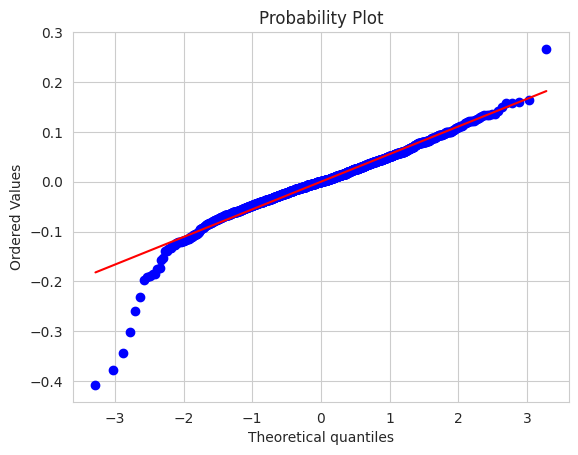

In [ ]:
df_a = teste_hipotese(modelo_statsmodels_multi_1, X_test, y_test)
df_r = df_r.append(df_a, ignore_index=True)

In [ ]:
df_r

modelo  registros  simetria  \
0  <statsmodels.regression.linear_model.Regressio...     1354.0 -2.204825   
1  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.334558   
2  <statsmodels.regression.linear_model.Regressio...     1354.0 -1.155391   
3  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.858767   

     curtose    jaquebera p_jaquebera p_fstatistic  rsquared  rsquared_adj  \
0  10.172747  3999.564410        True         True  0.511880      0.511518   
1   6.456272   699.202004        True         True  0.435943      0.435526   
2   6.215694   884.635952        True         True  0.555763      0.555435   
3   8.502710  1874.711425        True         True  0.844697      0.842720   

                                          pvalues_ok  \
0                         const, mortalidade_adultos   
1                            const, composicao_renda   
2                                const, escolaridade   
3  const, composicao_renda, mortalidade_infantil,...   

                                         pvalues_nok  \
0                                                      
1                                                      
2                                                      
3  alcool, perc_depesas, sarampo, poliomielite, g...   

                          omnibus  pagan  white durbin_watson          aic  \
0  (True, 5.758755904908227e-143)  False  False         False -2369.160803   
1    (True, 6.87881995228533e-31)  False  False         False -2173.382743   
2  (True, 1.1517505024572792e-67)  False  False         False -2496.714129   
3  (True, 4.2943799890072865e-65)  False  False         False -3887.736890   

           bic                                             X_test  \
0 -2358.739166        mortalidade_adultos
1263            -1.1...   
1 -2162.961106        composicao_renda
1263          0.574927
...   
2 -2486.292492        escolaridade
1263      0.980282
1685    ...   
3 -3793.942157          alcool  composicao_renda  mortalidade_...   

                                              y_test  
0  1263    4.351567
1685    3.895894
1556    4.29...  
1  1263    4.351567
1685    3.895894
1556    4.29...  
2  1263    4.351567
1685    3.895894
1556    4.29...  
3  1263    4.351567
1685    3.895894
1556    4.29...

<Axes: ylabel='Density'>

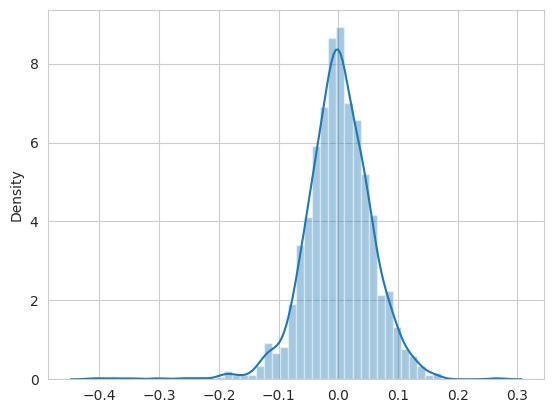

In [ ]:
sns.distplot(modelo_statsmodels_multi_1.resid, kde=True)
#sns.histplot(modelo_statsmodels_multi_1.resid, kde=True, bins=20)

As variáveis alcool, perc_depesas, sarampo, poliomielite,gastos_totais, pib, desnutricao_5-9 estão com o p-value
maior que 0,05, e por iso serão excluídas do modelo.

In [ ]:
#Modelo escolhido
X = df[['composicao_renda', 'mortalidade_infantil', 'mortalidade_adultos', \
        'mortes_menor_5_anos', 'difteria', 'hiv_aids', 'populacao', 'desnutricao_10-19'\
        , 'escolaridade', 'situacao_0', 'situacao_1' ]]
y = df["expectativa_vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_2 = sm.OLS(y_train, X_train_com_constante, hasconst = True
                                    #,missing='drop' #tratar valores ausentes
                                    ).fit()
print(modelo_statsmodels_multi_2.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     719.5
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:09:30   Log-Likelihood:                 1953.2
No. Observations:                1354   AIC:                            -3884.
Df Residuals:                    1343   BIC:                            -3827.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7981 

------------------------------------------------------------------------------------------
------------------------------
AJUSTE GERAL DO MODELO
------------------------------
------------------------------
Existem 1354 registros
------------------------------
[R-Squared] O R² tem o valor: 0.8427016067278876.
[R-Squared Ajustado] O R² ajustado tem o valor: 0.8415303603148414.
[F-statistic p-valor] O p-valor do F é 0.0 e indica ser normal (não podemos rejeitar H0)
[Skew] A simetria(skew) tem o valor: -0.8527659361090646. Verificar o skewtest
[Kurtosis] O achatamento(kurtosis) tem o valor: 8.297368000556261. Verificar o kurtosistest
[AIC] valor -3884.4543129450503
[BIC] valor -3827.135309956856
------------------------------
[P> t] - Ajuste pontuais dos parâmetros do modelo
------------------------------
[P> t] Valores irregulares: mortes_menor_5_anos
[P> t] Valores regulares: const, composicao_renda, mortalidade_infantil, mortalidade_adultos, difteria, hiv_aids, populacao, desnutricao_1

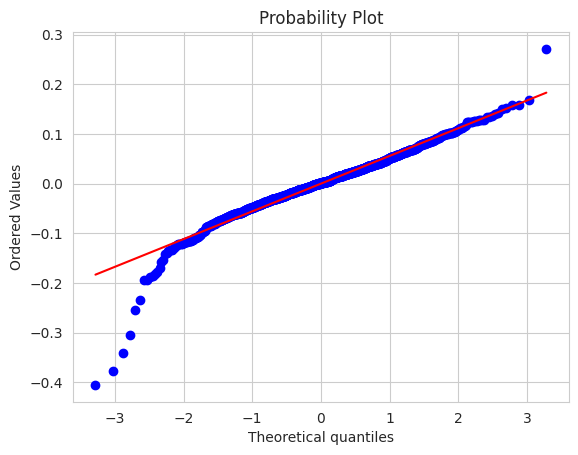

In [ ]:
#teste_hipotese(modelo_statsmodels_multi_2)
df_r = df_r.append(teste_hipotese(modelo_statsmodels_multi_2, X_test, y_test), ignore_index=True)

In [ ]:
df_r

modelo  registros  simetria  \
0  <statsmodels.regression.linear_model.Regressio...     1354.0 -2.204825   
1  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.334558   
2  <statsmodels.regression.linear_model.Regressio...     1354.0 -1.155391   
3  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.858767   
4  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.852766   

     curtose    jaquebera p_jaquebera p_fstatistic  rsquared  rsquared_adj  \
0  10.172747  3999.564410        True         True  0.511880      0.511518   
1   6.456272   699.202004        True         True  0.435943      0.435526   
2   6.215694   884.635952        True         True  0.555763      0.555435   
3   8.502710  1874.711425        True         True  0.844697      0.842720   
4   8.297368  1747.277576        True         True  0.842702      0.841530   

                                          pvalues_ok  \
0                         const, mortalidade_adultos   
1                            const, composicao_renda   
2                                const, escolaridade   
3  const, composicao_renda, mortalidade_infantil,...   
4  const, composicao_renda, mortalidade_infantil,...   

                                         pvalues_nok  \
0                                                      
1                                                      
2                                                      
3  alcool, perc_depesas, sarampo, poliomielite, g...   
4                                mortes_menor_5_anos   

                          omnibus  pagan  white durbin_watson          aic  \
0  (True, 5.758755904908227e-143)  False  False         False -2369.160803   
1    (True, 6.87881995228533e-31)  False  False         False -2173.382743   
2  (True, 1.1517505024572792e-67)  False  False         False -2496.714129   
3  (True, 4.2943799890072865e-65)  False  False         False -3887.736890   
4   (True, 9.190164968615282e-64)  False  False         False -3884.454313   

           bic                                             X_test  \
0 -2358.739166        mortalidade_adultos
1263            -1.1...   
1 -2162.961106        composicao_renda
1263          0.574927
...   
2 -2486.292492        escolaridade
1263      0.980282
1685    ...   
3 -3793.942157          alcool  composicao_renda  mortalidade_...   
4 -3827.135310        composicao_renda  mortalidade_infantil  ...   

                                              y_test  
0  1263    4.351567
1685    3.895894
1556    4.29...  
1  1263    4.351567
1685    3.895894
1556    4.29...  
2  1263    4.351567
1685    3.895894
1556    4.29...  
3  1263    4.351567
1685    3.895894
1556    4.29...  
4  1263    4.351567
1685    3.895894
1556    4.29...

<Axes: ylabel='Density'>

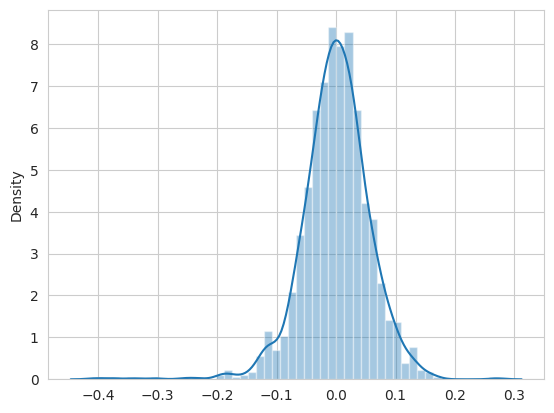

In [ ]:
#sns.histplot(modelo_statsmodels_multi_2.resid, kde=True, bins=20)
sns.distplot(modelo_statsmodels_multi_2.resid, kde=True)

Agora testamos o modelo sem a variável mortes_menor_5_anos, pois ela apresentou o p-value de 0,053 no modelo anterior.

In [ ]:
X = df[['composicao_renda', 'mortalidade_infantil', 'mortalidade_adultos', \
        'difteria', 'hiv_aids', 'populacao', 'desnutricao_10-19'\
        , 'escolaridade', 'situacao_0', 'situacao_1' ]]

y = df["expectativa_vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_3 = sm.OLS(y_train, X_train_com_constante, hasconst = True
                                    #,missing='drop' #tratar valores ausentes
                                    ).fit()
print(modelo_statsmodels_multi_3.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     797.4
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:09:32   Log-Likelihood:                 1951.3
No. Observations:                1354   AIC:                            -3883.
Df Residuals:                    1344   BIC:                            -3831.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7997 

------------------------------------------------------------------------------------------
------------------------------
AJUSTE GERAL DO MODELO
------------------------------
------------------------------
Existem 1354 registros
------------------------------
[R-Squared] O R² tem o valor: 0.8422619211334406.
[R-Squared Ajustado] O R² ajustado tem o valor: 0.8412056393553162.
[F-statistic p-valor] O p-valor do F é 0.0 e indica ser normal (não podemos rejeitar H0)
[Skew] A simetria(skew) tem o valor: -0.8427919017379127. Verificar o skewtest
[Kurtosis] O achatamento(kurtosis) tem o valor: 8.222434533280202. Verificar o kurtosistest
[AIC] valor -3882.674847809554
[BIC] valor -3830.566663274832
------------------------------
[P> t] - Ajuste pontuais dos parâmetros do modelo
------------------------------
[P> t] Valores regulares: const, composicao_renda, mortalidade_infantil, mortalidade_adultos, difteria, hiv_aids, populacao, desnutricao_10-19, escolaridade, situacao_0, situacao_1
------

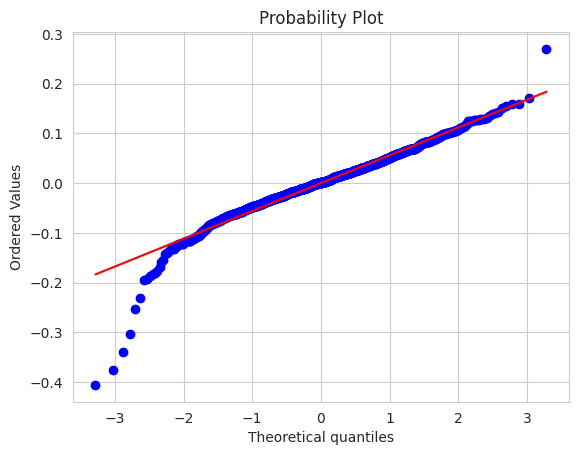

In [ ]:
#teste_hipotese(modelo_statsmodels_multi_3)
df_r = df_r.append(teste_hipotese(modelo_statsmodels_multi_3, X_test, y_test), ignore_index=True)

<Axes: ylabel='Density'>

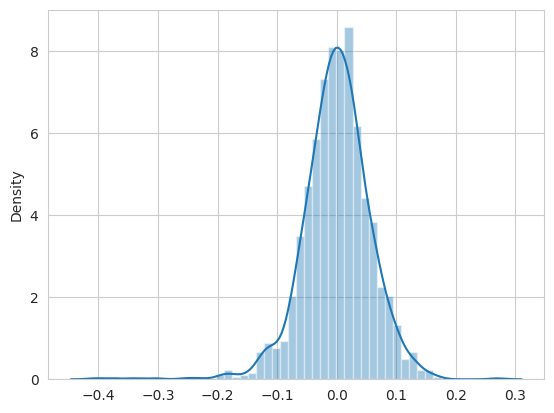

In [ ]:
sns.distplot(modelo_statsmodels_multi_3.resid, kde=True)

In [ ]:
df_r

modelo  registros  simetria  \
0  <statsmodels.regression.linear_model.Regressio...     1354.0 -2.204825   
1  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.334558   
2  <statsmodels.regression.linear_model.Regressio...     1354.0 -1.155391   
3  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.858767   
4  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.852766   
5  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.842792   

     curtose    jaquebera p_jaquebera p_fstatistic  rsquared  rsquared_adj  \
0  10.172747  3999.564410        True         True  0.511880      0.511518   
1   6.456272   699.202004        True         True  0.435943      0.435526   
2   6.215694   884.635952        True         True  0.555763      0.555435   
3   8.502710  1874.711425        True         True  0.844697      0.842720   
4   8.297368  1747.277576        True         True  0.842702      0.841530   
5   8.222435  1698.988775        True         True  0.842262      0.841206   

                                          pvalues_ok  \
0                         const, mortalidade_adultos   
1                            const, composicao_renda   
2                                const, escolaridade   
3  const, composicao_renda, mortalidade_infantil,...   
4  const, composicao_renda, mortalidade_infantil,...   
5  const, composicao_renda, mortalidade_infantil,...   

                                         pvalues_nok  \
0                                                      
1                                                      
2                                                      
3  alcool, perc_depesas, sarampo, poliomielite, g...   
4                                mortes_menor_5_anos   
5                                                      

                          omnibus  pagan  white durbin_watson          aic  \
0  (True, 5.758755904908227e-143)  False  False         False -2369.160803   
1    (True, 6.87881995228533e-31)  False  False         False -2173.382743   
2  (True, 1.1517505024572792e-67)  False  False         False -2496.714129   
3  (True, 4.2943799890072865e-65)  False  False         False -3887.736890   
4   (True, 9.190164968615282e-64)  False  False         False -3884.454313   
5   (True, 7.151863543707962e-63)  False  False         False -3882.674848   

           bic                                             X_test  \
0 -2358.739166        mortalidade_adultos
1263            -1.1...   
1 -2162.961106        composicao_renda
1263          0.574927
...   
2 -2486.292492        escolaridade
1263      0.980282
1685    ...   
3 -3793.942157          alcool  composicao_renda  mortalidade_...   
4 -3827.135310        composicao_renda  mortalidade_infantil  ...   
5 -3830.566663        composicao_renda  mortalidade_infantil  ...   

                                              y_test  
0  1263    4.351567
1685    3.895894
1556    4.29...  
1  1263    4.351567
1685    3.895894
1556    4.29...  
2  1263    4.351567
1685    3.895894
1556    4.29...  
3  1263    4.351567
1685    3.895894
1556    4.29...  
4  1263    4.351567
1685    3.895894
1556    4.29...  
5  1263    4.351567
1685    3.895894
1556    4.29...

Agora vamos retirar as variáveis que ficaram com o coeficiente próximo de zero: difteria, populacao e
desnutricao_10-19.


A retirada dos atributos com coeficiente próximo de zero piorou o R2 Ajustado para 0,833.
        

In [ ]:
#X = df[['composicao_renda', 'mortalidade_infantil', 'mortalidade_adultos', \
#        'difteria', 'hiv_aids', 'populacao', 'desnutricao_10-19'\
#        , 'escolaridade']]
X = df[['composicao_renda', 'mortalidade_infantil', 'mortalidade_adultos', \
        'hiv_aids', 'escolaridade', 'situacao_0', 'situacao_1' ]]
y = df["expectativa_vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_4 = sm.OLS(y_train, X_train_com_constante, hasconst = True
                                        #,missing='drop' #tratar valores ausentes
                                    ).fit()
print(modelo_statsmodels_multi_4.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1126.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:09:33   Log-Likelihood:                 1916.1
No. Observations:                1354   AIC:                            -3818.
Df Residuals:                    1347   BIC:                            -3782.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7919 

------------------------------------------------------------------------------------------
------------------------------
AJUSTE GERAL DO MODELO
------------------------------
------------------------------
Existem 1354 registros
------------------------------
[R-Squared] O R² tem o valor: 0.833825999526777.
[R-Squared Ajustado] O R² ajustado tem o valor: 0.8330858035335779.
[F-statistic p-valor] O p-valor do F é 0.0 e indica ser normal (não podemos rejeitar H0)
[Skew] A simetria(skew) tem o valor: -0.8000465721856952. Verificar o skewtest
[Kurtosis] O achatamento(kurtosis) tem o valor: 8.236065634734539. Verificar o kurtosistest
[AIC] valor -3818.1321163832927
[BIC] valor -3781.6563872089873
------------------------------
[P> t] - Ajuste pontuais dos parâmetros do modelo
------------------------------
[P> t] Valores regulares: const, composicao_renda, mortalidade_infantil, mortalidade_adultos, hiv_aids, escolaridade, situacao_0, situacao_1
------------------------------
TESTES DE RESÍ

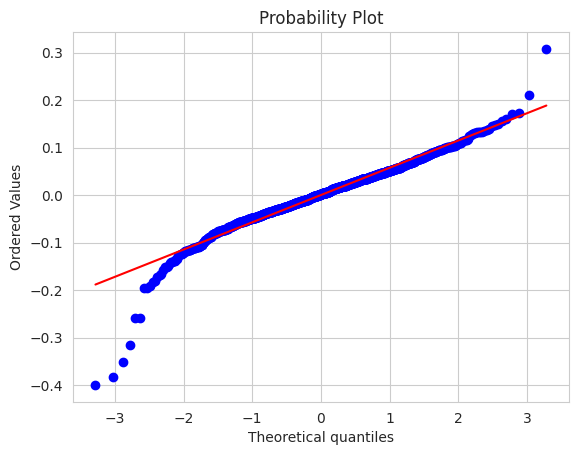

In [ ]:
#teste_hipotese(modelo_statsmodels_multi_4)
df_r = df_r.append(teste_hipotese(modelo_statsmodels_multi_4, X_test, y_test), ignore_index=True)

In [ ]:
df_r.sort_values('rsquared_adj', ascending=False)

modelo  registros  simetria  \
3  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.858767   
4  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.852766   
5  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.842792   
6  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.800047   
2  <statsmodels.regression.linear_model.Regressio...     1354.0 -1.155391   
0  <statsmodels.regression.linear_model.Regressio...     1354.0 -2.204825   
1  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.334558   

     curtose    jaquebera p_jaquebera p_fstatistic  rsquared  rsquared_adj  \
3   8.502710  1874.711425        True         True  0.844697      0.842720   
4   8.297368  1747.277576        True         True  0.842702      0.841530   
5   8.222435  1698.988775        True         True  0.842262      0.841206   
6   8.236066  1691.184442        True         True  0.833826      0.833086   
2   6.215694   884.635952        True         True  0.555763      0.555435   
0  10.172747  3999.564410        True         True  0.511880      0.511518   
1   6.456272   699.202004        True         True  0.435943      0.435526   

                                          pvalues_ok  \
3  const, composicao_renda, mortalidade_infantil,...   
4  const, composicao_renda, mortalidade_infantil,...   
5  const, composicao_renda, mortalidade_infantil,...   
6  const, composicao_renda, mortalidade_infantil,...   
2                                const, escolaridade   
0                         const, mortalidade_adultos   
1                            const, composicao_renda   

                                         pvalues_nok  \
3  alcool, perc_depesas, sarampo, poliomielite, g...   
4                                mortes_menor_5_anos   
5                                                      
6                                                      
2                                                      
0                                                      
1                                                      

                          omnibus  pagan  white durbin_watson          aic  \
3  (True, 4.2943799890072865e-65)  False  False         False -3887.736890   
4   (True, 9.190164968615282e-64)  False  False         False -3884.454313   
5   (True, 7.151863543707962e-63)  False  False         False -3882.674848   
6   (True, 9.044225331639825e-61)  False  False         False -3818.132116   
2  (True, 1.1517505024572792e-67)  False  False         False -2496.714129   
0  (True, 5.758755904908227e-143)  False  False         False -2369.160803   
1    (True, 6.87881995228533e-31)  False  False         False -2173.382743   

           bic                                             X_test  \
3 -3793.942157          alcool  composicao_renda  mortalidade_...   
4 -3827.135310        composicao_renda  mortalidade_infantil  ...   
5 -3830.566663        composicao_renda  mortalidade_infantil  ...   
6 -3781.656387        composicao_renda  mortalidade_infantil  ...   
2 -2486.292492        escolaridade
1263      0.980282
1685    ...   
0 -2358.739166        mortalidade_adultos
1263            -1.1...   
1 -2162.961106        composicao_renda
1263          0.574927
...   

                                              y_test  
3  1263    4.351567
1685    3.895894
1556    4.29...  
4  1263    4.351567
1685    3.895894
1556    4.29...  
5  1263    4.351567
1685    3.895894
1556    4.29...  
6  1263    4.351567
1685    3.895894
1556    4.29...  
2  1263    4.351567
1685    3.895894
1556    4.29...  
0  1263    4.351567
1685    3.895894
1556    4.29...  
1  1263    4.351567
1685    3.895894
1556    4.29...

Diante das análises realizadas, o modelo escolhido foi modelo_statsmodels_multi_2 que gerou um R2 ajustado de 0,842.

In [ ]:
print(df_r[4:5]['modelo'])
print(df_r[4:5])

4    <statsmodels.regression.linear_model.Regressio...
Name: modelo, dtype: object
                                              modelo  registros  simetria  \
4  <statsmodels.regression.linear_model.Regressio...     1354.0 -0.852766   

    curtose    jaquebera p_jaquebera p_fstatistic  rsquared  rsquared_adj  \
4  8.297368  1747.277576        True         True  0.842702       0.84153   

                                          pvalues_ok          pvalues_nok  \
4  const, composicao_renda, mortalidade_infantil,...  mortes_menor_5_anos   

                         omnibus  pagan  white durbin_watson          aic  \
4  (True, 9.190164968615282e-64)  False  False         False -3884.454313   

          bic                                             X_test  \
4 -3827.13531        composicao_renda  mortalidade_infantil  ...   

                                              y_test  
4  1263    4.351567
1685    3.895894
1556    4.29...  


Text(0.5, 0, 'Predito')

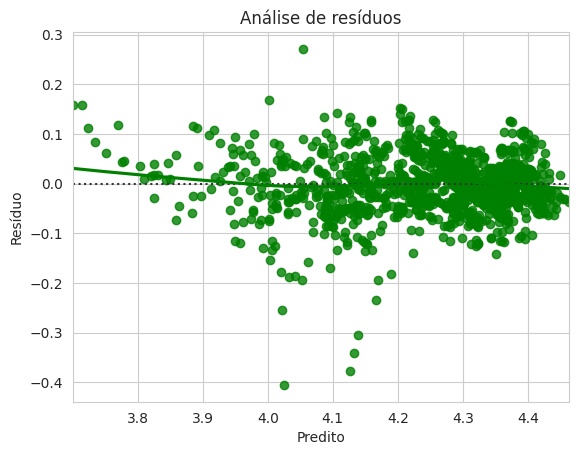

In [ ]:
ax_residual = sns.residplot(x=modelo_statsmodels_multi_2.predict(), y=modelo_statsmodels_multi_2.resid, lowess=True, color="g")
ax_residual.set_title("Análise de resíduos")
plt.ylabel('Resíduo')
plt.xlabel('Predito')

# Avaliando performance de modelos de regressão

In [ ]:
import statsmodels.api as sm
from sklearn import metrics
from math import sqrt

for i, row in df_r.iterrows():

    modelo = row['modelo']
    X_test = row['X_test']
    y_test = row['y_test']

    # Aplicar as transformações nos dados de teste

    y_pred_exp = np.expm1(modelo.predict(sm.add_constant(X_test)))
    y_test_exp = np.expm1(y_test)


    # Calcular métricas
    mse = metrics.mean_squared_error(y_test_exp, y_pred_exp)
    rmse = round(sqrt(mse),2)
    mae = metrics.mean_absolute_error(y_test_exp, y_pred_exp)

    # Armazenar os resultados das métricas
    df_r.at[i, 'mse'] = mse
    df_r.at[i, 'rmse'] = rmse
    df_r.at[i, 'mae'] = mae


In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   modelo         7 non-null      object 
 1   registros      7 non-null      float64
 2   simetria       7 non-null      float64
 3   curtose        7 non-null      float64
 4   jaquebera      7 non-null      float64
 5   p_jaquebera    7 non-null      object 
 6   p_fstatistic   7 non-null      object 
 7   rsquared       7 non-null      float64
 8   rsquared_adj   7 non-null      float64
 9   pvalues_ok     7 non-null      object 
 10  pvalues_nok    7 non-null      object 
 11  omnibus        7 non-null      object 
 12  pagan          7 non-null      object 
 13  white          7 non-null      object 
 14  durbin_watson  7 non-null      object 
 15  aic            7 non-null      float64
 16  bic            7 non-null      float64
 17  X_test         7 non-null      object 
 18  y_test        

In [ ]:
df_r['mse'] = df_r['mse'].astype(float)
df_r['rmse'] = df_r['rmse'].astype(float)
df_r['mae'] = df_r['mae'].astype(float)

In [ ]:
def formatar_valor(x):
    if x < 1000:
        return format(x, '.2f')
    else:
        return format(x, '.2e')

df_formatado = df_r[['mse', 'rmse', 'mae']].applymap(lambda x: formatar_valor(x))

print ('''
EXPLICAÇÃO:
Por causa dos termos quadrados, maiores disparidades entre
os valores reais e os previstos são “punidos” mais severamente
pelo MSE do que pelo MAE. Ou seja, o MSE e o RMSE são mais sensíveis
aos outliers do que o MAE.
Se decidirmos que os outliers em nosso conjunto de dados não
são significativos na análise dos dados, podemos nos voltar
para o MAE antes do MSE, pois os resíduos dos outliers não
seriam exagerados a partir do quadrado dos resíduos.
       ''')

print("""Como temos outliers em diversas variáveis optamos por ordenar pelo rmse,
que punirá os outliers e estará na mesma unidade de medida da variável original""")

print(30*"-")
print(f"Foram estimados {len(df_formatado)} modelos")
print(30*"-")

print("Os seguintes modelos estão com valores nan e serão removidos da lista")
print(df_formatado.query('rmse == "nan"'))
print("Modelos após remoção dos modelos com nan e Ordenação por rmse")
df_formatado = df_formatado.query('rmse != "nan"')
df_ordenado = df_formatado.sort_values(['rmse', 'mse', 'mae'], ascending=True).rename(columns={'index':'idModelo'})
df_ordenado



EXPLICAÇÃO:
Por causa dos termos quadrados, maiores disparidades entre
os valores reais e os previstos são “punidos” mais severamente
pelo MSE do que pelo MAE. Ou seja, o MSE e o RMSE são mais sensíveis
aos outliers do que o MAE.
Se decidirmos que os outliers em nosso conjunto de dados não
são significativos na análise dos dados, podemos nos voltar
para o MAE antes do MSE, pois os resíduos dos outliers não
seriam exagerados a partir do quadrado dos resíduos.
       
Como temos outliers em diversas variáveis optamos por ordenar pelo rmse,
que punirá os outliers e estará na mesma unidade de medida da variável original
------------------------------
Foram estimados 7 modelos
------------------------------
Os seguintes modelos estão com valores nan e serão removidos da lista
Empty DataFrame
Columns: [mse, rmse, mae]
Index: []
Modelos após remoção dos modelos com nan e Ordenação por rmse


mse  rmse   mae
3  14.30  3.78  2.90
6  14.45  3.80  2.92
5  14.46  3.80  2.92
4  14.47  3.80  2.91
2  35.99  6.00  4.68
1  45.43  6.74  4.91
0  52.83  7.27  5.23

Dados do melhor modelo

In [ ]:
df_r.iloc[df_ordenado.index[0]].X_test.shape

(339, 18)

In [ ]:
df.shape

(1693, 21)

#Simulador e outros algoritmos de regressão

## Simulador

Para responder como a variável target é influenciada pelos modelos foi desenvolvido um simulador que permite alterar os valores de algum país para entender a influência de cada variável explicativa.

In [ ]:
def simulador(dados_antigos, dados_simulados, target):
  X_simulador = sm.add_constant(dados_simulados).iloc[0,:]
  y_simulador = target
  X_simulador_old = sm.add_constant(dados_antigos).iloc[0,:]
  modelo_preditor = df_r.modelo[df_ordenado.index[0]]

  y_pred_exp_old =  np.expm1(modelo_preditor.predict(X_simulador_old)[0])
  y_pred_exp =  np.expm1(modelo_preditor.predict(X_simulador)[0])  #np.exp(modelo.predict(sm.add_constant(X_simulador)))
  y_test_exp = np.expm1(y_simulador)

  print("Expectativa Prevista com modificação de 10% nas mortalidades infantil e adulto:", y_pred_exp)
  print("Expectativa Prevista sem modificação:", y_pred_exp_old)
  print("Expectativa real:", y_test_exp)
  print("Valor Alterado em: {:.2f}%".format(100*(y_pred_exp - y_pred_exp_old) / y_pred_exp_old))

2. Um país com expectativa de vida menor (<65) deve aumentar seus investimentos em saúde a fim de melhorar sua expectativa de vida média?

In [ ]:
df_real = df[df['expectativa_vida'] < 65][colunas_numericas]
df_simular = df_real.copy()
df_simular['perc_depesas'] *= 1.3
df_simular['gastos_totais'] *= 1.3
target = df["expectativa_vida"][0]
simulador(df_real, df_simular, target)

Expectativa Prevista com modificação de 10% nas mortalidades infantil e adulto: 59.8019492322107
Expectativa Prevista sem modificação: 59.84199007851747
Expectativa real: 59.89999999999999
Valor Alterado em: -0.07%


3. Como as taxas de mortalidade infantil e de adultos afetam a expectativa de vida?

In [ ]:
df_real = df[colunas_numericas]
df_simular = df_real.copy()
df_simular['mortalidade_infantil'] *= 1.1
df_simular['mortalidade_adultos'] *= 1.1
target = df["expectativa_vida"][0]
simulador(df_real, df_simular, target)

Expectativa Prevista com modificação de 10% nas mortalidades infantil e adulto: 59.31816901860674
Expectativa Prevista sem modificação: 59.84199007851747
Expectativa real: 59.89999999999999
Valor Alterado em: -0.88%


4. A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.?

In [ ]:
df_real = df[colunas_numericas]
df_simular = df_real.copy()
#df_simular['imc'] *= 1.1 # variavel removida
df_simular['alcool'] *= 1.1
target = df["expectativa_vida"][0]
simulador(df_real, df_simular, target)

Expectativa Prevista com modificação de 10% nas mortalidades infantil e adulto: 59.8418841286922
Expectativa Prevista sem modificação: 59.84199007851747
Expectativa real: 59.89999999999999
Valor Alterado em: -0.00%


5. Qual é o impacto da escolaridade na expectativa de vida dos humanos?

In [ ]:
df_real = df[colunas_numericas]
df_simular = df_real.copy()
df_simular['escolaridade'] *= 1.1
target = df["expectativa_vida"][0]
simulador(df_real, df_simular, target)

Expectativa Prevista com modificação de 10% nas mortalidades infantil e adulto: 59.64551042077012
Expectativa Prevista sem modificação: 59.84199007851747
Expectativa real: 59.89999999999999
Valor Alterado em: -0.33%


6. A expectativa de vida tem uma relação positiva ou negativa com o consumo de álcool?


In [ ]:
df_real = df[colunas_numericas]
df_simular = df_real.copy()
df_simular['alcool'] *= 1.5
target = df["expectativa_vida"][0]
simulador(df_real, df_simular, target)

Expectativa Prevista com modificação de 10% nas mortalidades infantil e adulto: 59.84146033123618
Expectativa Prevista sem modificação: 59.84199007851747
Expectativa real: 59.89999999999999
Valor Alterado em: -0.00%


## Linear Model

In [ ]:
from sklearn.metrics import  r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer

score_metrics = {'r2': 'r2', 'MAE_abs': 'neg_mean_absolute_error', 'MSE_log' :'neg_mean_squared_log_error' }

#df_estimators_scores = pd.DataFrame(columns=['Estimator', 'Cross-validation Scores', 'Test Set Scores'])

In [ ]:
df_r.iloc[df_ordenado.index[0]].X_test.columns.values#[df_ordenado.index[0]]

array(['alcool', 'composicao_renda', 'mortalidade_infantil',
       'mortalidade_adultos', 'perc_depesas', 'sarampo',
       'mortes_menor_5_anos', 'poliomielite', 'gastos_totais', 'difteria',
       'hiv_aids', 'pib', 'populacao', 'desnutricao_10-19',
       'desnutricao_5-9', 'escolaridade', 'situacao_0', 'situacao_1'],
      dtype=object)

In [ ]:
colunas_melhor_modelo = df_r.iloc[df_ordenado.index[0]].X_test.columns.values
X = df[colunas_melhor_modelo]   #df[colunas_numericas]#.drop('expectativa_vida', axis=1)
y = df["expectativa_vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_1 = sm.OLS(y_train, X_train_com_constante, hasconst = True
                                    #,missing='drop' #tratar valores ausentes
                                    ).fit()
print(modelo_statsmodels_multi_1.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     427.4
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:27:06   Log-Likelihood:                 1961.9
No. Observations:                1354   AIC:                            -3888.
Df Residuals:                    1336   BIC:                            -3794.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7989 

In [ ]:
linear_model = LinearRegression().fit(X_train, y_train)
r2 = round(linear_model.score(X_train, y_train),3)
print("Coeficiente de determinação (R²): {}".format(r2))

Coeficiente de determinação (R²): 0.845


In [ ]:
previsao_lr = linear_model.predict(X_test)

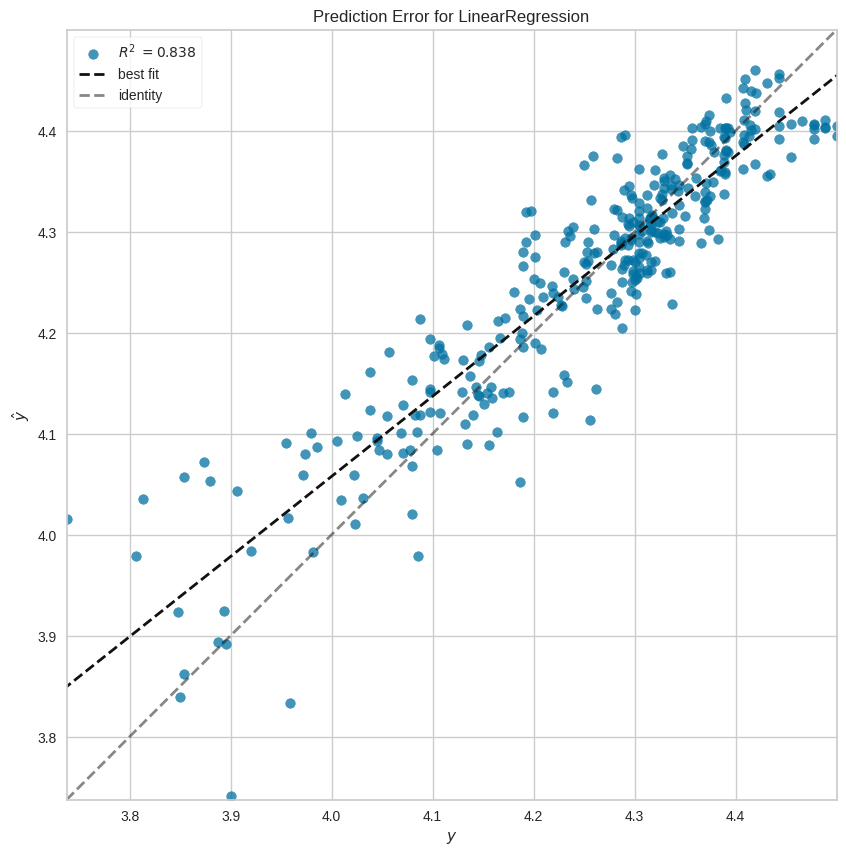

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(linear_model)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Instanciando o modelo
dtr = DecisionTreeRegressor(random_state= seed, max_depth=5)

In [ ]:
print('Parameters currently in use:\n')
print(dtr.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


**Randomized Search Cross Validation**

In [ ]:
# n_estimators
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(100, 350, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {#'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf #,
               #'bootstrap': bootstrap
               }

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [100, 162, 225, 287, 350, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
# First create the base model to tune
dtr = DecisionTreeRegressor(random_state= seed)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=dtr,
                                   param_distributions=random_grid,
                                   n_iter=20, #5
                                   scoring=score_metrics,#'r2',#score_metrics,
                                   refit='MSE_log',
                                   cv=5, #3
                                   verbose=1,
                                   random_state= seed,
                                   n_jobs =2)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=20, n_jobs=2,
                   param_distributions={'max_depth': [100, 162, 225, 287, 350,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, refit='MSE_log',
                   scoring={'MAE_abs': 'neg_mean_absolute_error',
                            'MSE_log': 'neg_mean_squared_log_error',
                            'r2': 'r2'},
                   verbose=1)

In [ ]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
#print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 287}

-6.593650585443253e-05


In [ ]:
pd.DataFrame(random_search.cv_results_).T

0   \
mean_fit_time                                                     0.014827   
std_fit_time                                                      0.000992   
mean_score_time                                                   0.003661   
std_score_time                                                    0.000397   
param_min_samples_split                                                 10   
param_min_samples_leaf                                                   2   
param_max_features                                                    auto   
param_max_depth                                                        350   
params                   {'min_samples_split': 10, 'min_samples_leaf': ...   
split0_test_r2                                                    0.924547   
split1_test_r2                                                    0.904308   
split2_test_r2                                                    0.924219   
split3_test_r2                                                    0.920631   
split4_test_r2                                                    0.880015   
mean_test_r2                                                      0.910744   
std_test_r2                                                       0.017062   
rank_test_r2                                                             6   
split0_test_MAE_abs                                              -0.025022   
split1_test_MAE_abs                                              -0.027089   
split2_test_MAE_abs                                              -0.026991   
split3_test_MAE_abs                                               -0.02538   
split4_test_MAE_abs                                              -0.030613   
mean_test_MAE_abs                                                -0.027019   
std_test_MAE_abs                                                   0.00198   
rank_test_MAE_abs                                                       10   
split0_test_MSE_log                                              -0.000057   
split1_test_MSE_log                                              -0.000079   
split2_test_MSE_log                                              -0.000065   
split3_test_MSE_log                                              -0.000056   
split4_test_MSE_log                                              -0.000095   
mean_test_MSE_log                                                -0.000071   
std_test_MSE_log                                                  0.000015   
rank_test_MSE_log                                                        6   

                                                                        1   \
mean_fit_time                                                     0.006589   
std_fit_time                                                      0.000811   
mean_score_time                                                   0.003043   
std_score_time                                                    0.000692   
param_min_samples_split                                                  5   
param_min_samples_leaf                                                   1   
param_max_features                                                    sqrt   
param_max_depth                                                        100   
params                   {'min_samples_split': 5, 'min_samples_leaf': 1...   
split0_test_r2                                                    0.856591   
split1_test_r2                                                    0.849216   
split2_test_r2                                                    0.811123   
split3_test_r2                                                     0.81842   
split4_test_r2                                                    0.816549   
mean_test_r2                                                       0.83038   
std_test_r2                                                       0.018692   
rank_test_r2                                                            14   
split0_test_MAE

In [ ]:
results = random_search.cv_results_

In [ ]:
best_rfc = random_search.best_estimator_
best_rfc

DecisionTreeRegressor(max_depth=287, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

### Treinamento e avaliação do modelo



In [ ]:
best_scorer_index = np.nonzero(results['rank_test_MSE_log'] == 1)[0][0]
#best_scorer_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
best_scorer_index

4

In [ ]:
best_rfc.fit(X_train, y_train)
rfc_pred = best_rfc.predict(X_test)

In [ ]:
#Treino
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#Teste
previsao_dtr = dtr.predict(X_test)

In [ ]:
#Resultados da previsão
previsao_dtr

array([4.3359827 , 3.81990772, 4.29728541, 4.22829253, 4.46590812,
       4.48863637, 4.4152196 , 4.27666612, 4.32015123, 4.40671925,
       4.38701418, 4.14472077, 4.32677816, 4.32015123, 4.4543473 ,
       4.07414185, 4.26267988, 4.32677816, 4.1009891 , 3.85862223,
       4.15888308, 4.1463043 , 4.40671925, 4.33336146, 4.16355963,
       4.38077585, 4.24849524, 4.3605476 , 4.09600984, 4.33990171,
       4.29182837, 4.21803603, 4.22244456, 4.18813844, 4.36944785,
       4.24420032, 4.13836145, 4.13676528, 4.25419326, 3.97217693,
       4.25561271, 4.366913  , 4.34380542, 4.30406509, 3.99636415,
       4.18509893, 4.31882056, 4.30811095, 4.29045944, 4.30406509,
       4.40671925, 4.40793802, 4.09100566, 4.29728541, 4.41158544,
       4.06731589, 4.27944005, 4.05525717, 4.31481788, 4.42124735,
       4.30676415, 4.30406509, 4.18965474, 3.91601503, 4.32677816,
       4.17438727, 4.33073334, 4.37575702, 4.30406509, 4.31882056,
       4.22683375, 4.41763506, 4.12874599, 4.38701418, 4.33467

**Gráfico de erro de predição**: Um gráfico de erros de predição mostra os alvos reais em relação aos valores previstos. Em um modelo perfeito, esses pontos estariam alinhados em 45 grau.


Para saber mais sobre outras visualizações:
[**Documentação YellowBrick**](https://www.scikit-yb.org/en/latest/)



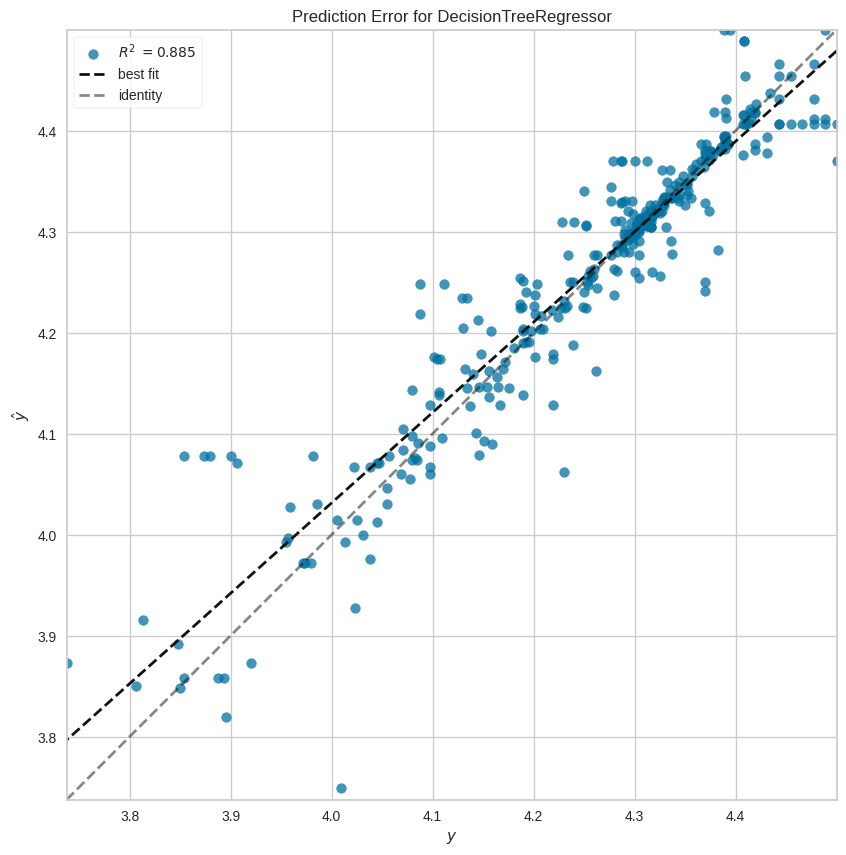

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(dtr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Métrica

In [ ]:
#coeficiente de determinacao
r2_dtr = r2_score(y_test, previsao_dtr)
r2_dtr

0.8849448610484851

## Floresta Aleatória

**Ponto de Atenção**
Os parâmetros são praticamente os mesmos entre o `DecisionTreeRegressor()` e o `RandomForestRegressor()`, com exceção de:

* `n_estimators`: quantidade de árvores na floresta
* `bootstrap`: define se será utilizado o método estatístico de amostragem *bootstrap*
* `oob_score`: define se será utilizado o método de amostragem *out-of-bag* para mensurar os erros da predição
* `n_jobs`: número de *jobs* rodando paralelamente (computação paralela - processadores)
* `warm_start`: faz a adequação de uma nova floresta ou usa uma floresta existente.
* `max_samples`: para o caso do `bootstrap` ser `True`, define o número de amostras a serem extraídas de X para treinar cada árvore base.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer

#score_metrics = {'F1': 'f1_macro', 'Accuracy': make_scorer(accuracy_score)}

#df_estimators_scores = pd.DataFrame(columns=['Estimator', 'Cross-validation Scores', 'Test Set Scores'])

**Randomized Search Cross Validation**

In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(100, 350, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 250, 300, 350, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [100, 162, 225, 287, 350, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# First create the base model to tune
rfc = RandomForestRegressor(random_state= seed)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=20, #5
                                   scoring=score_metrics,
                                   refit='MSE_log',#True,#'F1',
                                   cv=5, #3
                                   verbose=1,
                                   random_state= seed,
                                   n_jobs =2)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [100, 162, 225, 287, 350,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=42, refit='MSE_log',
                   scoring={'MAE_abs': 'neg_mean_absolute_error',
                            'MSE_log': 'neg_mean_squared_log_error',
                            'r2': 'r2'},
                   verbose=1)

In [ ]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
#print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

-3.8789626107080316e-05


In [ ]:
pd.DataFrame(random_search.cv_results_).T

0   \
mean_fit_time                                                     1.134721   
std_fit_time                                                      0.041722   
mean_score_time                                                   0.048516   
std_score_time                                                    0.006127   
param_n_estimators                                                     350   
param_min_samples_split                                                  2   
param_min_samples_leaf                                                   2   
param_max_features                                                    sqrt   
param_max_depth                                                        350   
param_bootstrap                                                       True   
params                   {'n_estimators': 350, 'min_samples_split': 2, ...   
split0_test_r2                                                    0.966401   
split1_test_r2                                                     0.93556   
split2_test_r2                                                    0.940593   
split3_test_r2                                                    0.947895   
split4_test_r2                                                    0.919588   
mean_test_r2                                                      0.942007   
std_test_r2                                                       0.015336   
rank_test_r2                                                             9   
split0_test_MAE_abs                                              -0.017908   
split1_test_MAE_abs                                               -0.02027   
split2_test_MAE_abs                                              -0.022331   
split3_test_MAE_abs                                              -0.020396   
split4_test_MAE_abs                                              -0.023213   
mean_test_MAE_abs                                                -0.020823   
std_test_MAE_abs                                                  0.001842   
rank_test_MAE_abs                                                        9   
split0_test_MSE_log                                              -0.000025   
split1_test_MSE_log                                              -0.000055   
split2_test_MSE_log                                              -0.000051   
split3_test_MSE_log                                              -0.000037   
split4_test_MSE_log                                              -0.000066   
mean_test_MSE_log                                                -0.000047   
std_test_MSE_log                                                  0.000014   
rank_test_MSE_log                                                        9   

                                                                        1   \
mean_fit_time                                                     5.287823   
std_fit_time                                                      0.545765   
mean_score_time                                                   0.059176   
std_score_time                                                    0.026169   
param_n_estimators                                                     350   
param_min_samples_split                                                  5   
param_min_samples_leaf                                                   1   
param_max_features                                                    auto   
param_max_depth                                                        100   
param_bootstrap                                                      False   
params                   {'n_estimators': 350, 'min_samples_split': 5, ...   
split0_test_r2                                                    0.919873   
split1_test_r2                                                    0.922261   
split2_test_r2                                                    0.931684   
split3_test_r2                                                    0.921632   
split4_test_r2 

In [ ]:
results = random_search.cv_results_

In [ ]:
best_rfc = random_search.best_estimator_
best_rfc

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      n_estimators=350, random_state=42)

### Treinamento e avaliação do modelo



In [ ]:
best_scorer_index = np.nonzero(results['rank_test_MSE_log'] == 1)[0][0]
#best_scorer_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
best_scorer_index

3

In [ ]:
best_rfc.fit(X_train, y_train)
rfc_pred = best_rfc.predict(X_test)

**Gráfico de erro de predição**

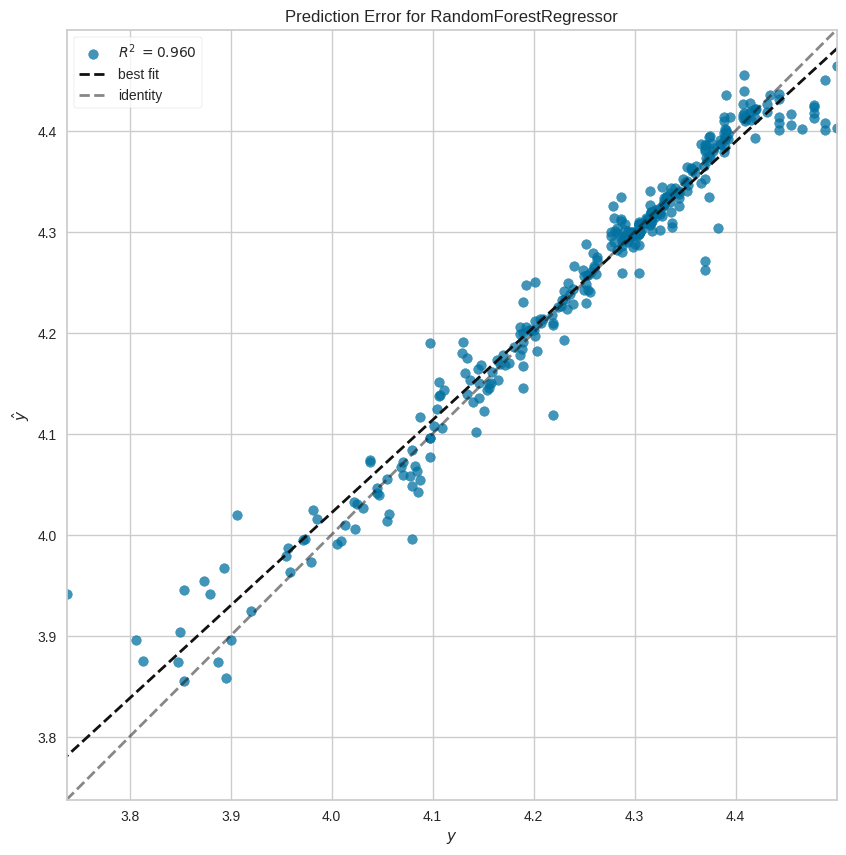

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(best_rfc) #rfc)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Métrica de desempenho

In [ ]:
#coeficiente de determinacao
r2_rf = r2_score(y_test, rfc_pred)
r2_rf

0.9596567955912314

## SVM.SVR - Máquina de Vetores de Suporte - Regressão

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline

### Execução sem RandomSearchCV

In [ ]:
#Instanciando o modelo
svr = svm.SVR()

In [ ]:
print('Parameters currently in use:\n')
print(svr.get_params())

Parameters currently in use:

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svr = make_pipeline(StandardScaler(), svm.SVR(C=1.0, epsilon=0.2))
svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
svr_pred = svr.predict(X_test)

#### Gráfico de erro de predição

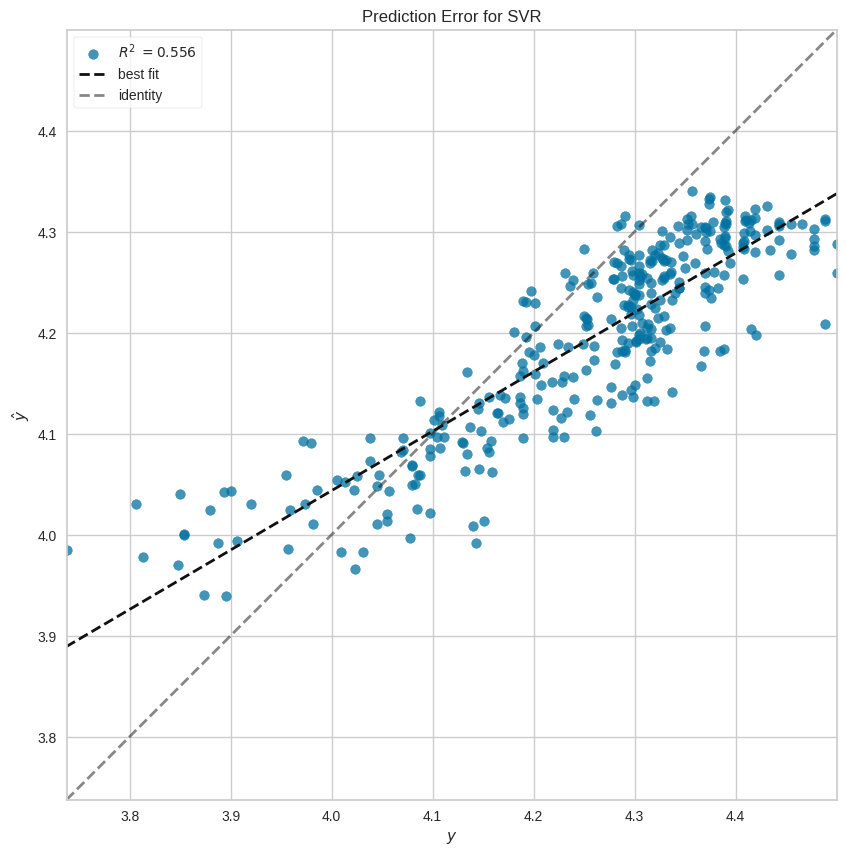

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(svr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Métrica de desempenho

In [ ]:
#coeficiente de determinacao
r2_rf = r2_score(y_test, svr_pred)
r2_rf

0.5557666485161552

### Execução com Randomized Search Cross Validation

In [ ]:
# C
C = [.0001, .001, .01, 1]
#C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1,'scale', 'auto']
#gamma = ['auto']

# degree
#degree = [1, 2, 3, 4, 5] # Só funciona com kernel poly

# kernel
kernel = ['linear', 'rbf', 'sigmoid']
#kernel = ['poly']

# probability
#probability = [True, False]

# Create the random grid
random_grid = {'svr__C': C,
              'svr__kernel': kernel,
              'svr__gamma': gamma,
     #         'degree': degree,
          #    'probability': probability
             }

pprint(random_grid)

{'svr__C': [0.0001, 0.001, 0.01, 1],
 'svr__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto'],
 'svr__kernel': ['linear', 'rbf', 'sigmoid']}


In [ ]:
# First create the base model to tune
#svr = svm.SVR()
svr = make_pipeline(StandardScaler(), svm.SVR())

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svr,
                                   param_distributions=random_grid,
                                   n_iter=20,
                                   scoring=score_metrics,
                                   refit='MSE_log',#True,#'F1',
                                   cv=5,
                                   verbose=1,
                                   random_state= seed,
                                   n_jobs =2)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=20, n_jobs=2,
                   param_distributions={'svr__C': [0.0001, 0.001, 0.01, 1],
                                        'svr__gamma': [0.0001, 0.001, 0.01, 0.1,
                                                       1, 'scale', 'auto'],
                                        'svr__kernel': ['linear', 'rbf',
                                                        'sigmoid']},
                   random_state=42, refit='MSE_log',
                   scoring={'MAE_abs': 'neg_mean_absolute_error',
                            'MSE_log': 'neg_mean_squared_log_error',
                            'r2': 'r2'},
                   verbose=1)

In [ ]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
#print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'svr__kernel': 'rbf', 'svr__gamma': 0.01, 'svr__C': 1}

-0.00010885302307294789


In [ ]:
pd.DataFrame(random_search.cv_results_).T

0   \
mean_fit_time                                                 0.016046   
std_fit_time                                                  0.001491   
mean_score_time                                               0.004792   
std_score_time                                                0.000222   
param_svr__kernel                                                  rbf   
param_svr__gamma                                                   0.1   
param_svr__C                                                         1   
params               {'svr__kernel': 'rbf', 'svr__gamma': 0.1, 'svr...   
split0_test_r2                                                0.813495   
split1_test_r2                                                0.761076   
split2_test_r2                                                0.805649   
split3_test_r2                                                 0.77567   
split4_test_r2                                                0.749674   
mean_test_r2                                                  0.781113   
std_test_r2                                                    0.02478   
rank_test_r2                                                         6   
split0_test_MAE_abs                                           -0.04705   
split1_test_MAE_abs                                          -0.053317   
split2_test_MAE_abs                                          -0.048564   
split3_test_MAE_abs                                          -0.047342   
split4_test_MAE_abs                                          -0.053176   
mean_test_MAE_abs                                             -0.04989   
std_test_MAE_abs                                              0.002788   
rank_test_MAE_abs                                                    6   
split0_test_MSE_log                                          -0.000137   
split1_test_MSE_log                                          -0.000193   
split2_test_MSE_log                                          -0.000164   
split3_test_MSE_log                                          -0.000161   
split4_test_MSE_log                                          -0.000194   
mean_test_MSE_log                                             -0.00017   
std_test_MSE_log                                              0.000021   
rank_test_MSE_log                                                    6   

                                                                    1   \
mean_fit_time                                                 0.012547   
std_fit_time                                                  0.000744   
mean_score_time                                               0.004586   
std_score_time                                                0.000965   
param_svr__kernel                                               linear   
param_svr__gamma                                                0.0001   
param_svr__C                                                    0.0001   
params               {'svr__kernel': 'linear', 'svr__gamma': 0.0001...   
split0_test_r2                                                0.719798   
split1_test_r2                                                0.685889   
split2_test_r2                                                0.695371   
split3_test_r2                                                 0.72218   
split4_test_r2                                                0.654813   
mean_test_r2                                                   0.69561   
std_test_r2                                                   0.024698   
rank_test_r2                                                         9   
split0_test_MAE_abs                                           -0.06106   
split1_test_MAE_abs                                          -0.063087   
split2_test_MAE_abs                                          -0.064651   
split3_test_MAE_abs                                          -0.059453   
split4_test_MAE_abs                                          -0.063356 

In [ ]:
results = random_search.cv_results_

In [ ]:
best_rfc = random_search.best_estimator_
best_rfc

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, gamma=0.01))])

### Treinamento e avaliação do modelo



In [ ]:
best_scorer_index = np.nonzero(results['rank_test_MSE_log'] == 1)[0][0]
#best_scorer_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
best_scorer_index

5

In [ ]:
best_rfc.fit(X_train, y_train)
svr_pred = best_rfc.predict(X_test)

#### Gráfico de erro de predição

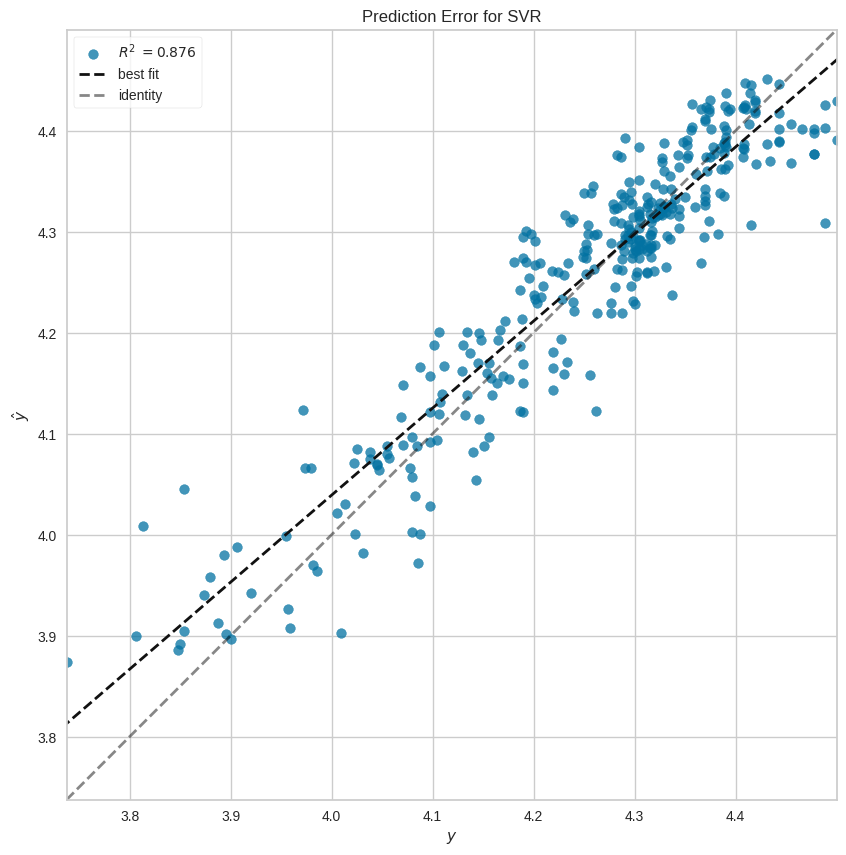

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(best_rfc) #rfc)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Métrica de desempenho

In [ ]:
#coeficiente de determinacao
r2_rf = r2_score(y_test, svr_pred)
r2_rf

0.8758060083972758

### Outros Tipos de Regressão que podem ser usados



```
Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

Elastic Net Regression
from sklearn.linear_model import ElasticNet

Stochastic Gradient Descent Regression
from sklearn.linear_model import SGDRegressor

Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge

CatBoost Regressor
from catboost import CatBoostRegressor

Kernel Ridge Regression
from sklearn.kernel_ridge import KernelRidge

XGBoost Regressor
from xgboost.sklearn import XGBRegressor

LGBM Regressor
from lightgbm import LGBMRegressor

RANSAC is good for strong outliers in the y direction

TheilSen is good for small outliers, both in direction X and y, but has a break point above which it performs worse than OLS.
```



## GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

**Randomized Search Cross Validation**

In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(100, 350, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 250, 300, 350, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [100, 162, 225, 287, 350, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
# First create the base model to tune
reg = GradientBoostingRegressor(random_state= seed)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=reg,
                                   param_distributions=random_grid,
                                   n_iter=20, #5
                                   scoring=score_metrics,
                                   refit='MSE_log', #True,#'F1',
                                   cv=5, #3
                                   verbose=1,
                                   random_state=8,
                                   n_jobs =2)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=2,
                   param_distributions={'max_depth': [100, 162, 225, 287, 350,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=8, refit='MSE_log',
                   scoring={'MAE_abs': 'neg_mean_absolute_error',
                            'MSE_log': 'neg_mean_squared_log_error',
                            'r2': 'r2'},
                   verbose=1)

In [ ]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
#print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 350}

-3.9902783452309035e-05


In [ ]:
pd.DataFrame(random_search.cv_results_).T

0   \
mean_fit_time                                                     3.129466   
std_fit_time                                                      0.364773   
mean_score_time                                                   0.012978   
std_score_time                                                    0.004203   
param_n_estimators                                                     300   
param_min_samples_split                                                  5   
param_min_samples_leaf                                                   1   
param_max_features                                                    auto   
param_max_depth                                                        350   
params                   {'n_estimators': 300, 'min_samples_split': 5, ...   
split0_test_r2                                                    0.933951   
split1_test_r2                                                    0.942278   
split2_test_r2                                                    0.940937   
split3_test_r2                                                    0.943584   
split4_test_r2                                                    0.901172   
mean_test_r2                                                      0.932384   
std_test_r2                                                       0.015957   
rank_test_r2                                                            18   
split0_test_MAE_abs                                              -0.022284   
split1_test_MAE_abs                                              -0.018015   
split2_test_MAE_abs                                              -0.021757   
split3_test_MAE_abs                                              -0.020189   
split4_test_MAE_abs                                              -0.024443   
mean_test_MAE_abs                                                -0.021338   
std_test_MAE_abs                                                  0.002148   
rank_test_MAE_abs                                                       18   
split0_test_MSE_log                                               -0.00005   
split1_test_MSE_log                                              -0.000049   
split2_test_MSE_log                                              -0.000051   
split3_test_MSE_log                                               -0.00004   
split4_test_MSE_log                                               -0.00008   
mean_test_MSE_log                                                -0.000054   
std_test_MSE_log                                                  0.000014   
rank_test_MSE_log                                                       18   

                                                                        1   \
mean_fit_time                                                      6.57698   
std_fit_time                                                      0.733718   
mean_score_time                                                   0.013612   
std_score_time                                                    0.004746   
param_n_estimators                                                     300   
param_min_samples_split                                                 10   
param_min_samples_leaf                                                   1   
param_max_features                                                    auto   
param_max_depth                                                        350   
params                   {'n_estimators': 300, 'min_samples_split': 10,...   
split0_test_r2                                                     0.94681   
split1_test_r2                                                    0.947827   
split2_test_r2                                                    0.947802   
split3_test_r2                                                    0.951024   
split4_test_r2                                                    0.918617   
mean_test_r2                                                      0.942416   
std_test_r2    

In [ ]:
results = random_search.cv_results_

In [ ]:
best_rfc = random_search.best_estimator_
best_rfc

GradientBoostingRegressor(max_depth=350, max_features='auto',
                          min_samples_leaf=4, n_estimators=200,
                          random_state=42)

### Treinamento e avaliação do modelo



In [ ]:
best_scorer_index = np.nonzero(results['rank_test_MSE_log'] == 1)[0][0]
#best_scorer_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
best_scorer_index

16

In [ ]:
best_rfc.fit(X_train, y_train)
grb_pred = best_rfc.predict(X_test)

**Gráfico de erro de predição**

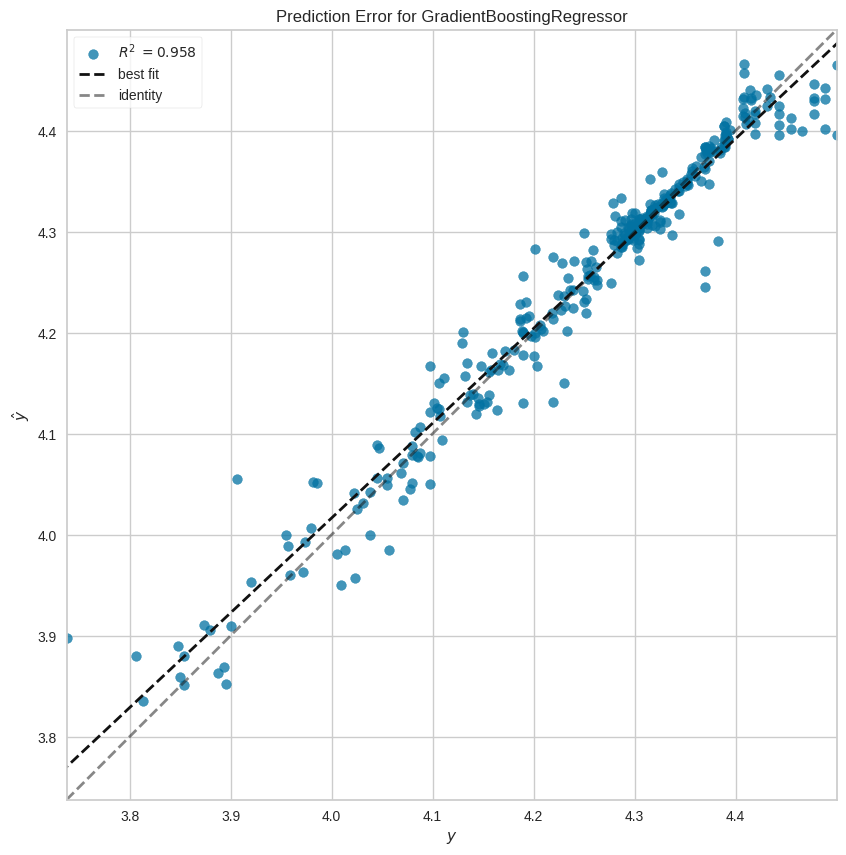

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(best_rfc) #rfc)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Métrica de desempenho

In [ ]:
#coeficiente de determinacao
r2_rf = r2_score(y_test, grb_pred)
r2_rf

0.9583081229387762

## XGBoost Regressor

In [ ]:
from xgboost.sklearn import XGBRegressor

## SGDRegressor - Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

### Execução sem RandomSearchCV

In [ ]:
#Instanciando o modelo
sgd = SGDRegressor(random_state= seed)

In [ ]:
print('Parameters currently in use:\n')
print(sgd.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, random_state= seed))
sgd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(random_state=42))])

In [ ]:
sgd_pred = sgd.predict(X_test)

#### Gráfico de erro de predição

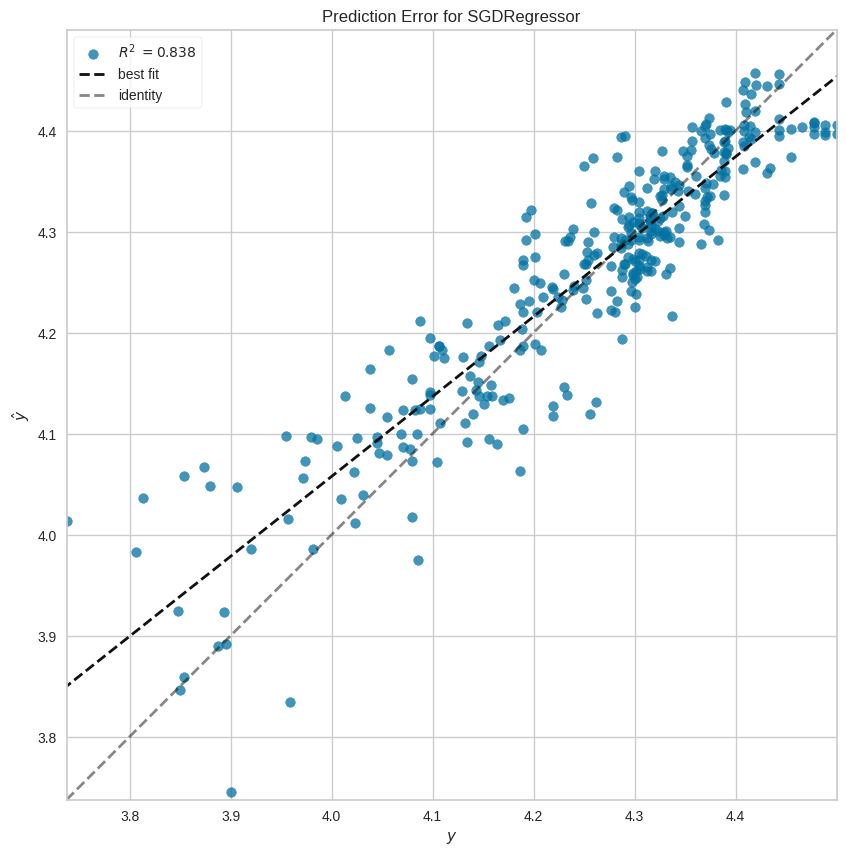

<Axes: title={'center': 'Prediction Error for SGDRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(sgd)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Métrica de desempenho

In [ ]:
#coeficiente de determinacao
r2_rf = r2_score(y_test, sgd_pred)
r2_rf

0.837720834697415

### Execução com Randomized Search Cross Validation

In [ ]:
# loss
loss = ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']

# alpha
alpha = [.0001, .001, .01, .1, 1]
# multiplica a penalidade(termo de regularização), quanto maior, mais forte.
#também usado para calcular o learning_rate quando setado para 'optimal'

max_iter=[10, 100, 1000]


tol=[1e-3, None]
# The stopping criterion

#penalidade(termo de regularização)
penalty = ['l2', 'l1', 'elasticnet', None]

l1_ratio = [0, 0.15, 0.5, 0.85, 1]
#0 aplica só l2, 1 aplica só l1
#l1 cria matrizes esparsas, serve para redução de dimensionalidade, redução de overfitting
#l2 cria coeficientes próximos, mas não zerados como no l1, ajuda na generalização e a evitar overfitting
# Only used if penalty is ‘elasticnet’. #elasticnet é o uso de l1 e l2 juntos


# probability
#probability = [True, False]

# Create the random grid
random_grid = {'sgd__loss': loss,
              'sgd__alpha': alpha,
              'sgd__max_iter': max_iter,
              'sgd__penalty': penalty,
              'sgd__l1_ratio': l1_ratio
             }

pprint(random_grid)

{'sgd__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
 'sgd__l1_ratio': [0, 0.15, 0.5, 0.85, 1],
 'sgd__loss': ['squared_error',
               'huber',
               'epsilon_insensitive',
               'squared_epsilon_insensitive'],
 'sgd__max_iter': [10, 100, 1000],
 'sgd__penalty': ['l2', 'l1', 'elasticnet', None]}


In [ ]:
# First create the base model to tune
#svr = svm.SVR()
sgd = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(random_state= seed))])

# Definition of the random search
random_search = RandomizedSearchCV(estimator=sgd,
                                   param_distributions=random_grid,
                                   n_iter=20,
                                   scoring=score_metrics,
                                   refit='MSE_log',
                                   cv=5,
                                   verbose=1,
                                   random_state= seed,
                                   n_jobs =2)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(random_state=42))]),
                   n_iter=20, n_jobs=2,
                   param_distributions={'sgd__alpha': [0.0001, 0.001, 0.01, 0.1,
                                                       1],
                                        'sgd__l1_ratio': [0, 0.15, 0.5, 0.85,
                                                          1],
                                        'sgd__loss': ['squared_error', 'huber',
                                                      'epsilon_insensitive',
                                                      'squared_epsilon_insensitive'],
                                        'sgd__max_iter': [10, 100, 1000],
                                        'sgd__penalty': ['l2', 'l1',
                                                         'elasticnet', None]},
                   random_state=42, refit='MSE_log',
                   scoring={'MAE_abs': 'neg_mean_absolute_error',
                            'MSE_log': 'neg_mean_squared_log_error',
                            'r2': 'r2'},
                   verbose=1)

In [ ]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
#print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'sgd__penalty': 'l1', 'sgd__max_iter': 100, 'sgd__loss': 'squared_error', 'sgd__l1_ratio': 0.5, 'sgd__alpha': 0.0001}

-0.00012862895563680736


In [ ]:
pd.DataFrame(random_search.cv_results_).T

0   \
mean_fit_time                                                 0.007215   
std_fit_time                                                  0.000408   
mean_score_time                                                0.00286   
std_score_time                                                0.000483   
param_sgd__penalty                                          elasticnet   
param_sgd__max_iter                                                 10   
param_sgd__loss                                    epsilon_insensitive   
param_sgd__l1_ratio                                                  1   
param_sgd__alpha                                                     1   
params               {'sgd__penalty': 'elasticnet', 'sgd__max_iter'...   
split0_test_r2                                               -0.005059   
split1_test_r2                                               -0.000209   
split2_test_r2                                                 -0.0046   
split3_test_r2                                                -0.02488   
split4_test_r2                                               -0.000002   
mean_test_r2                                                  -0.00695   
std_test_r2                                                   0.009212   
rank_test_r2                                                        17   
split0_test_MAE_abs                                          -0.116373   
split1_test_MAE_abs                                          -0.112255   
split2_test_MAE_abs                                          -0.116781   
split3_test_MAE_abs                                          -0.108524   
split4_test_MAE_abs                                          -0.110359   
mean_test_MAE_abs                                            -0.112858   
std_test_MAE_abs                                               0.00326   
rank_test_MAE_abs                                                   18   
split0_test_MSE_log                                          -0.000752   
split1_test_MSE_log                                          -0.000799   
split2_test_MSE_log                                          -0.000848   
split3_test_MSE_log                                          -0.000736   
split4_test_MSE_log                                          -0.000777   
mean_test_MSE_log                                            -0.000782   
std_test_MSE_log                                              0.000039   
rank_test_MSE_log                                                   17   

                                                                    1   \
mean_fit_time                                                 0.007387   
std_fit_time                                                  0.001057   
mean_score_time                                               0.002853   
std_score_time                                                0.000286   
param_sgd__penalty                                                  l1   
param_sgd__max_iter                                                 10   
param_sgd__loss                                          squared_error   
param_sgd__l1_ratio                                               0.85   
param_sgd__alpha                                                   0.1   
params               {'sgd__penalty': 'l1', 'sgd__max_iter': 10, 's...   
split0_test_r2                                                0.076634   
split1_test_r2                                                0.063377   
split2_test_r2                                                0.009418   
split3_test_r2                                               -0.005208   
split4_test_r2                                                0.048869   
mean_test_r2                                                  0.038618   
std_test_r2                                                   0.031422   
rank_test_r2                                                        16   
split0_test_MAE_abs                                          -0.110401 

In [ ]:
results = random_search.cv_results_

In [ ]:
best_rfc = random_search.best_estimator_
best_rfc

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDRegressor(l1_ratio=0.5, max_iter=100, penalty='l1',
                              random_state=42))])

### Treinamento e avaliação do modelo



In [ ]:
best_scorer_index = np.nonzero(results['rank_test_MSE_log'] == 1)[0][0]
#best_scorer_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
best_scorer_index

2

In [ ]:
best_rfc.fit(X_train, y_train)
rfc_pred = best_rfc.predict(X_test)

#### Gráfico de erro de predição

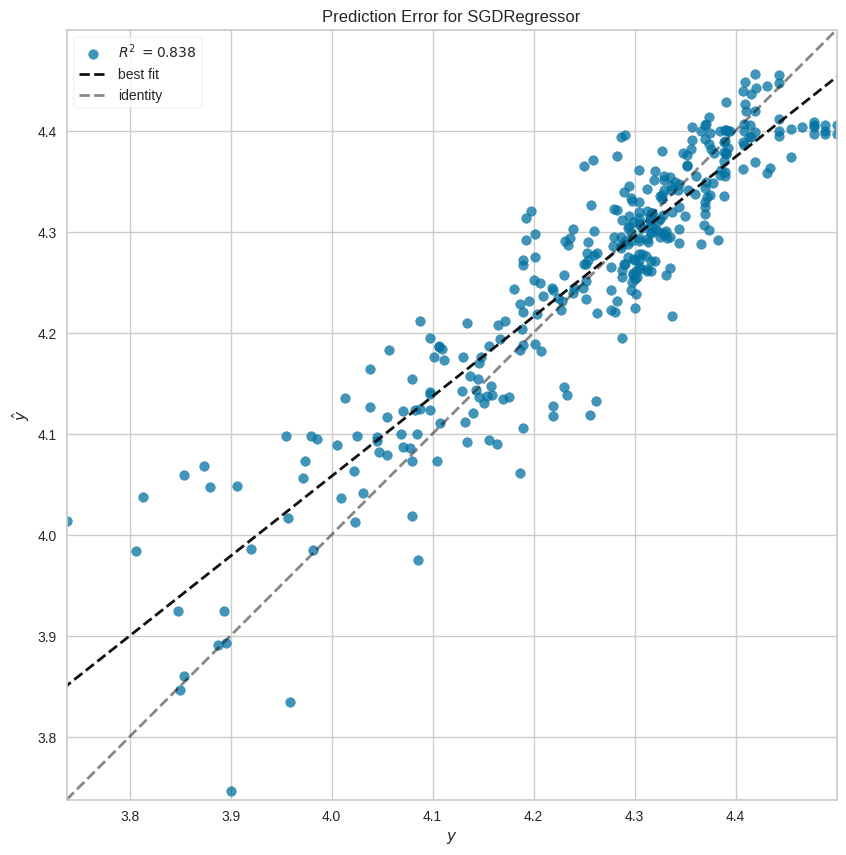

<Axes: title={'center': 'Prediction Error for SGDRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(best_rfc) #rfc)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Métrica de desempenho

In [ ]:
#coeficiente de determinacao
r2_rf = r2_score(y_test, rfc_pred)
r2_rf

0.8377486543025743

## Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df[colunas_melhor_modelo]#.drop('expectativa_vida', axis=1)
y = df["expectativa_vida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_1 = sm.OLS(y_train, X_train_com_constante, hasconst = True
                                    #,missing='drop' #tratar valores ausentes
                                    ).fit()
print(modelo_statsmodels_multi_1.summary())

                            OLS Regression Results                            
Dep. Variable:       expectativa_vida   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     427.4
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:34:52   Log-Likelihood:                 1961.9
No. Observations:                1354   AIC:                            -3888.
Df Residuals:                    1336   BIC:                            -3794.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.7989 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import SplineTransformer

In [ ]:
#polinomial_model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('ridge', Ridge(alpha=1e-3))])
polinomial_model = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))

In [ ]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()
#polinomial_model = polinomial_model.fit(X_train, y_train)
polinomial_model.fit(X_train_new, y_train)
r2 = round(polinomial_model.score(X_train_new, y_train),3)
print("Coeficiente de determinação (R²): {}".format(r2))

Coeficiente de determinação (R²): 0.923


In [ ]:
previsao_pm = polinomial_model.predict(X_test_new)

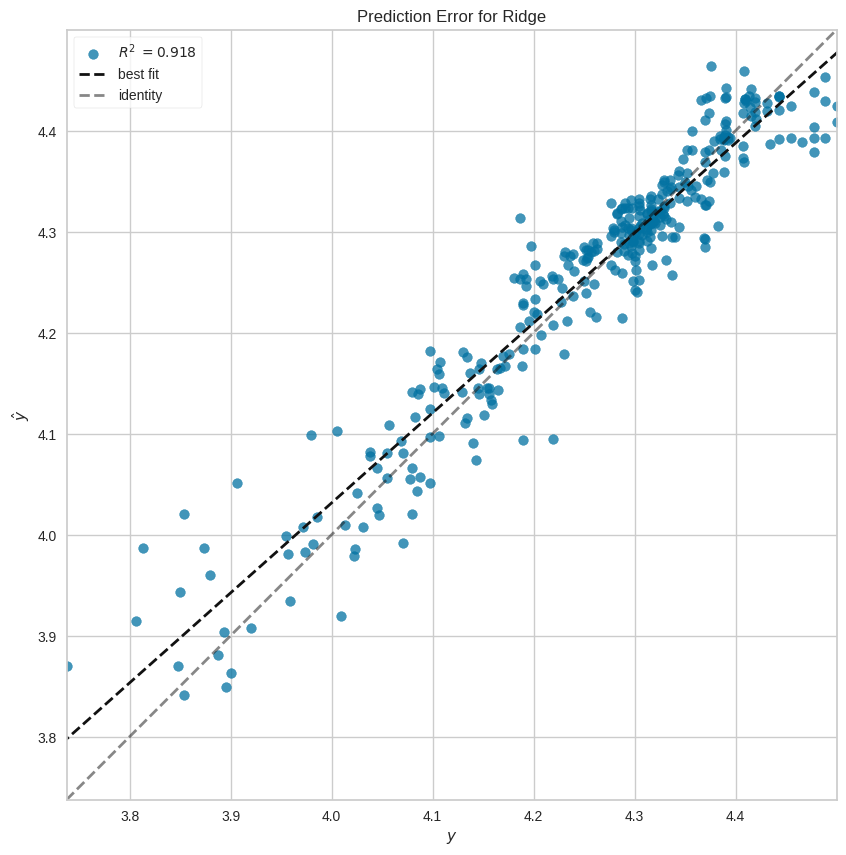

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(polinomial_model)
pev.fit(X_train_new, y_train)
pev.score(X_test_new, y_test)
pev.poof()